### LSE Data Analytics Online Career Accelerator - Eloise Farmer

# DA301:  Advanced Analytics for Organisational Impact

### Scenario
A data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points 
- exploring the structure using decision trees 
- exploring clusters in customer behaviour
- can social data (e.g. customer reviews) be used in marketing campaigns
- loading, transforming and visualising data in R 
- statistical analysis and modelling in R

# Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

#### OLS Selection
I chose to use Ordinary Least Squares (OLS) regression via the statsmodels package for my assignment. This decision was based on several factors:

- Consistency with course materials: The module demonstrations and template notebooks introduced regression using statsmodels OLS. Using the same approach ensures alignment with the taught methodology.

- Interpretability: OLS provides a detailed regression output including coefficients, standard errors, p-values, and confidence intervals. This allows me to not only model the relationship between variables but also comment on the statistical significance of predictors — valuable in a business or healthcare context.

- Mathematical equivalence: Both statsmodels OLS and sklearn’s LinearRegression solve the same underlying problem using the least squares method. The difference is mainly in their focus: statsmodels is oriented toward inference, while sklearn is oriented toward prediction. Using OLS therefore does not compromise the validity of my results.

- Predictive evaluation with split data: Although OLS does not natively support train/test splits, I implemented this manually. By training on 70% of the data and evaluating on 30%, I was able to calculate predictive metrics such as R², RMSE, and MAE on unseen data. This ensures my models are assessed both for statistical insight and predictive performance, aligning with the assignment’s theme of “Predicting future outcomes.”

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv("turtle_reviews.csv")

# View the DataFrame.
print(reviews.head())  # View first 5 rows
print("\nDataFrame shape:", reviews.shape)

   gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  A

In [3]:
# Sense check data types and metadata
print("\nData types:")
print(reviews.dtypes)
print("\nInfo:")
print(reviews.info())


Data types:
gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   pla

In [4]:
# Check for missing values
print("\nMissing values per column:")
print(reviews.isnull().sum())


Missing values per column:
gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64


In [5]:
# Explore the data
print("\nColumn names:")
print(reviews.columns)


Column names:
Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'language', 'platform', 'product',
       'review', 'summary'],
      dtype='object')


In [6]:
# Basic descriptive statistics
print("\nDescriptive statistics:")
print(reviews.describe())


Descriptive statistics:
               age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000  


## 2. Drop columns

In [7]:
# Drop unnecessary columns
reviews = reviews.drop(columns=['language', 'platform'])

# View column names
print("\nColumn names after dropping:")
print(reviews.columns)


Column names after dropping:
Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')


## 3. Rename columns

In [8]:
# Rename the column headers
reviews = reviews.rename(columns={
    'remuneration (k£)': 'remuneration',
    'spending_score (1-100)': 'spending_score'
})

# View column names
print("\nRenamed columns:")
print(reviews.columns)


Renamed columns:
Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')


## 4. Save the DataFrame as a CSV file

In [9]:
# Create a CSV file as output
reviews.to_csv("turtle_reviews_clean.csv", index=False)

In [10]:
# Import new CSV file with Pandas
clean_reviews = pd.read_csv("turtle_reviews_clean.csv")

# View DataFrame
print("\nRe-imported DataFrame shape:", clean_reviews.shape)
print(clean_reviews.info())
print("\nFirst 5 rows of re-imported DataFrame:\n", clean_reviews.head())


Re-imported DataFrame shape: (2000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB
None

First 5 rows of re-imported DataFrame:
    gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.1

## 5. Linear regression

### 5a) spending score and loyalty

In [11]:
# Define independent variable (X) and dependent variable (Y)
X = reviews['spending_score']
Y = reviews['loyalty_points']

# Add constant for intercept
X = sm.add_constant(X)

# Create model and print summary of metrics
model_spending = sm.OLS(Y, X).fit()
print(model_spending.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Wed, 01 Oct 2025   Prob (F-statistic):          2.92e-263
Time:                        17:12:43   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -75.0527     45.931     -1.

In [12]:
# Extract the estimated parameters
print("\nEstimated parameters:\n", model_spending.params)

# Extract the standard errors
print("\nStandard errors:\n", model_spending.bse)

# Extract the predicted values
reviews['pred_loyalty_spending'] = model_spending.predict(X)
print("\nPredicted loyalty points (first 5):\n", reviews['pred_loyalty_spending'].head())


Estimated parameters:
 const            -75.052663
spending_score    33.061693
dtype: float64

Standard errors:
 const             45.930554
spending_score     0.814419
dtype: float64

Predicted loyalty points (first 5):
 0    1214.353374
1    2602.944491
2     123.317497
3    2470.697718
4    1247.415067
Name: pred_loyalty_spending, dtype: float64


In [13]:
# Set the X coefficient and the constant to generate the regression table
intercept = model_spending.params['const']
slope = model_spending.params['spending_score']

# View the output.
print(f"\nRegression equation: Loyalty = {intercept:.2f} + {slope:.2f} * Spending_Score")


Regression equation: Loyalty = -75.05 + 33.06 * Spending_Score


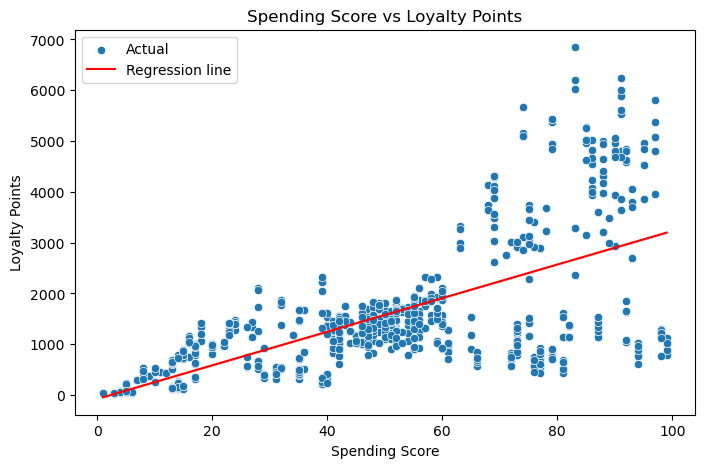

In [14]:
# Plot the graph with a regression line
plt.figure(figsize=(8,5))
sns.scatterplot(x='spending_score', y='loyalty_points', data=reviews, label='Actual')
sns.lineplot(x='spending_score', y='pred_loyalty_spending', data=reviews, color='red', label='Regression line')
plt.title("Spending Score vs Loyalty Points")
plt.xlabel("Spending Score")
plt.ylabel("Loyalty Points")
plt.legend()
plt.show()

#### Spending Score & Loyalty Points – Key Results

- **R² (Coefficient of Determination):** 0.452  
  - About **45.2% of the variation** in loyalty points is explained by spending score.  
  - This is a **moderately strong relationship**.

- **Correlation (R):** ≈ 0.67  
  - Indicates a **moderate-to-strong positive correlation** between spending score and loyalty points.

- **Slope (Coefficient):** 33.06  
  - For every **1-point increase in spending score**, loyalty points increase by **~33 points**.

- **Intercept:** -75.05  
  - At a spending score of 0, predicted loyalty points would be about **-75** (not meaningful but necessary for the regression equation).

- **p-value (spending_score):** 0.000  
  - Highly significant (**<0.05**).  
  - Spending score is a **statistically significant predictor** of loyalty points.

- **Standard error (slope):** 0.81  
  - Very low relative to the slope, meaning the estimate is **reliable**.

#### Assumption Checks – Spending Score & Loyalty Points (Simple Linear Regression)

- **Linearity:**  
  The scatterplot shows a clear positive trend, and the regression line captures this reasonably well. Some curvature at higher spending scores suggests slight non-linearity, but the assumption holds overall.

- **Independence of Errors:**  
  Durbin–Watson statistic ≈ 1.19 indicates mild positive autocorrelation. Since this is cross-sectional customer data rather than time series, violation is not severe.

- **Homoscedasticity (constant variance):**  
  From the scatterplot, variance increases at higher spending scores (points fan out more). This suggests **heteroscedasticity**. Standard errors may be underestimated for high spenders, so caution is needed when generalising.

- **Normality of Errors:**  
  Residual normality tests (Omnibus, Jarque–Bera) reject perfect normality. Residuals are skewed with heavy tails. With n=2000, the Central Limit Theorem mitigates this concern for coefficient inference.

- **Outliers / Influential Points:**  
  Several extreme loyalty scores exist (above 6000). These points don’t dominate the regression but do inflate variance. Robust regression or log-transform could be considered.

**Conclusion:**  
While linearity and significance are strong, some assumptions (homoscedasticity, normality of residuals) are mildly violated. The model is still useful for prediction and interpretation, but results should be communicated with these caveats.


### 5b) remuneration and loyalty

In [15]:
# Define independent and dependent variables
X = reviews['remuneration']
Y = reviews['loyalty_points']

# Add constant
X = sm.add_constant(X)

# Create model and print summary
model_renum = sm.OLS(Y, X).fit()
print(model_renum.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Wed, 01 Oct 2025   Prob (F-statistic):          2.43e-209
Time:                        17:12:48   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -65.6865     52.171     -1.259   

In [16]:
# Extract parameters
print("\nEstimated parameters:\n", model_renum.params)

# Extract standard errors
print("\nStandard errors:\n", model_renum.bse)

# Extract predicted values
reviews['pred_loyalty_renum'] = model_renum.predict(X)
print("\nPredicted loyalty points (first 5):\n", reviews['pred_loyalty_renum'].head())


Estimated parameters:
 const          -65.686513
remuneration    34.187825
dtype: float64

Standard errors:
 const           52.170717
remuneration     0.977925
dtype: float64

Predicted loyalty points (first 5):
 0    354.823741
1    354.823741
2    382.857758
3    382.857758
4    410.891774
Name: pred_loyalty_renum, dtype: float64


In [17]:
# Set the X coefficient and the constant to generate the regression table.
intercept = model_renum.params['const']
slope = model_renum.params['remuneration']

# View the output.
print(f"\nRegression equation: Loyalty = {intercept:.2f} + {slope:.2f} * Remuneration")


Regression equation: Loyalty = -65.69 + 34.19 * Remuneration


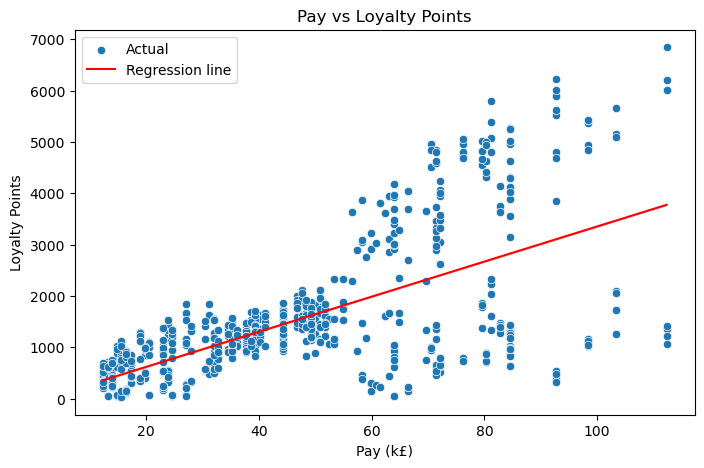

In [18]:
# Plot regression line
plt.figure(figsize=(8,5))
sns.scatterplot(x='remuneration', y='loyalty_points', data=reviews, label='Actual')
sns.lineplot(x='remuneration', y='pred_loyalty_renum', data=reviews, color='red', label='Regression line')
plt.title("Pay vs Loyalty Points")
plt.xlabel("Pay (k£)")
plt.ylabel("Loyalty Points")
plt.legend()
plt.show()

#### Remuneration & Loyalty Points – Key Results

- **R² (Coefficient of Determination):** 0.380  
  - About **38% of the variation** in loyalty points is explained by remuneration.  
  - This is a **moderate positive relationship**.

- **Correlation (R):** ≈ 0.62  
  - Indicates a **moderate positive correlation** between remuneration and loyalty points.

- **Slope (Coefficient):** 34.19  
  - For every additional **£1k in remuneration**, loyalty points increase by **~34 points**.

- **Intercept:** -65.69  
  - Predicted loyalty points would be **-65.7** if remuneration were £0k (not meaningful in practice).

- **p-value (remuneration):** 0.000  
  - Highly significant (**<0.05**).  
  - Remuneration is a **statistically significant predictor** of loyalty points.

- **Standard error (slope):** 0.98  
  - Very low relative to slope, meaning the estimate is **reliable**.


It’s still a strong predictor, but not as strong as spending score.

#### Assumption Checks – Remuneration & Loyalty Points (Simple Linear Regression)

- **Linearity:**  
  The scatterplot shows a broadly positive linear trend. The regression line fits the central tendency, though there is clear spread at higher pay levels, suggesting not all high-income customers generate proportional loyalty.

- **Independence of Errors:**  
  Durbin–Watson ≈ 3.62 suggests negative autocorrelation of residuals, which is unusual. As this is cross-sectional data (customers, not time series), it likely reflects noise or structure in the data rather than true dependence.

- **Homoscedasticity (constant variance):**  
  Variance increases with income: lower-income groups are tightly clustered, whereas higher-income groups spread widely in loyalty points. This indicates **heteroscedasticity**. Model predictions are less reliable for wealthier customers.

- **Normality of Errors:**  
  Omnibus and Jarque–Bera tests reject perfect normality (p < 0.001). Distribution of residuals is slightly skewed with heavier tails. With 2000 observations, the impact on inference is reduced but still worth noting.

- **Outliers / Influential Points:**  
  Several customers at high pay have very low loyalty, creating downward pull and increasing residual variance. These should be checked as potential influential points.

**Conclusion:**  
Remuneration is a statistically significant predictor of loyalty points (p < 0.001), explaining ~38% of the variance. While the model is useful, it suffers from **heteroscedasticity** and outliers, reducing reliability for very high-income customers. Spending Score remains the stronger predictor overall.


### 5c) age and loyalty

In [19]:
# Define independent and dependent variables
X = reviews['age']
Y = reviews['loyalty_points']

# Add constant
X = sm.add_constant(X)

# Create model and print summary
model_age = sm.OLS(Y, X).fit()
print(model_age.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Wed, 01 Oct 2025   Prob (F-statistic):             0.0577
Time:                        17:12:52   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1736.5177     88.249     19.678      0.0

In [20]:
# Extract parameters
print("\nEstimated parameters:\n", model_age.params)

# Extract standard errors
print("\nStandard errors:\n", model_age.bse)

# Extract predicted values
reviews['pred_loyalty_age'] = model_age.predict(X)
print("\nPredicted loyalty points (first 5):\n", reviews['pred_loyalty_age'].head())


Estimated parameters:
 const    1736.517739
age        -4.012805
dtype: float64

Standard errors:
 const    88.248731
age       2.113177
dtype: float64

Predicted loyalty points (first 5):
 0    1664.287247
1    1644.223221
2    1648.236026
3    1636.197611
4    1604.095169
Name: pred_loyalty_age, dtype: float64


In [21]:
# Set the X coefficient and the constant to generate the regression table
intercept = model_age.params['const']
slope = model_age.params['age']

# View the output
print(f"\nRegression equation: Loyalty = {intercept:.2f} + {slope:.2f} * Age")


Regression equation: Loyalty = 1736.52 + -4.01 * Age


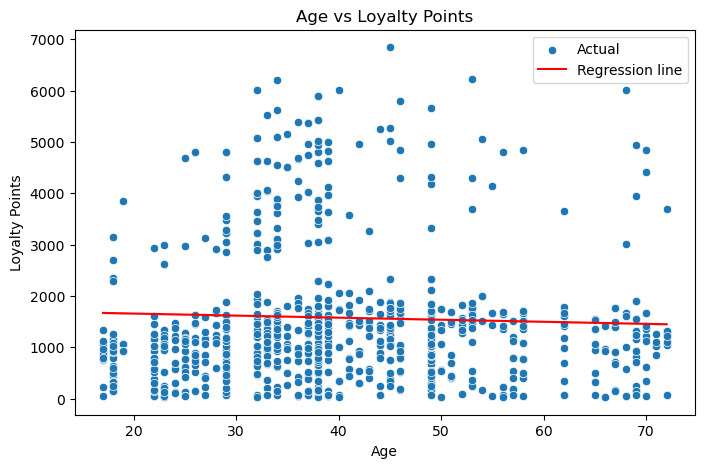

In [22]:
# Plot regression line
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='loyalty_points', data=reviews, label='Actual')
sns.lineplot(x='age', y='pred_loyalty_age', data=reviews, color='red', label='Regression line')
plt.title("Age vs Loyalty Points")
plt.xlabel("Age")
plt.ylabel("Loyalty Points")
plt.legend()
plt.show()

#### Age & Loyalty Points – Key Results

- **R² (Coefficient of Determination):** 0.002  
  - Age explains **only 0.2% of the variation** in loyalty points.  
  - This is effectively **no predictive power**.

- **Correlation (R):** ≈ -0.045  
  - Very weak **negative correlation**.

- **Slope (Coefficient):** -4.01  
  - Loyalty points decrease by about **4 points per year of age**, which is **negligible**.

- **Intercept:** 1736.52  
  - Predicted loyalty points at age 0 (not meaningful in context).

- **p-value (age):** 0.058  
  - **Not statistically significant** (p > 0.05).  
  - Age is **not a significant predictor** of loyalty points.

- **Standard error (slope):** 2.11  
  - Similar size to the slope, making this estimate **unreliable**.

#### Assumption Checks – Age & Loyalty Points (Simple Linear Regression)

- **Linearity:**  
  The scatterplot shows no clear linear relationship between age and loyalty points. The regression line is almost flat, reflecting the negligible slope.

- **Independence of Errors:**  
  Durbin–Watson ≈ 2.28, close to 2, suggests residuals are independent (no autocorrelation).

- **Homoscedasticity (constant variance):**  
  Variance in loyalty points appears similar across ages, so no strong evidence of heteroscedasticity. However, the spread is very wide at all ages, reducing interpretability.

- **Normality of Errors:**  
  Omnibus and Jarque–Bera tests indicate residuals are not normally distributed (skewed with heavy tails). With 2000 observations, this is less problematic, but it confirms the model fit is weak.

- **Outliers:**  
  Some extreme loyalty scores appear across all ages. These do not follow any age pattern, reinforcing the lack of correlation.

**Conclusion:**  
Age is not a statistically significant predictor of loyalty points (p = 0.058). The R² value (0.002) shows age explains virtually none of the variation in loyalty. This confirms that age was correctly excluded from further analysis.

## Compare regression results with a Train–Test Split

### spending_score & loyalty_points (with split)

spending_score → loyalty_points (OLS with split)
coef: 33.094 | intercept: -84.002
R² test:  0.461 | RMSE test: 934.551 | MAE test: 652.755


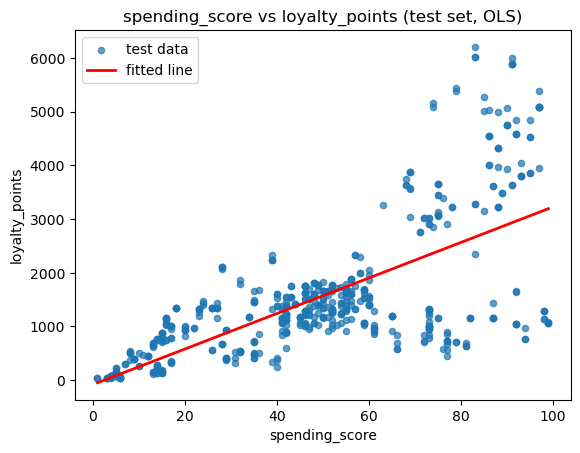

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# define X and y
X = reviews[['spending_score']]
y = reviews['loyalty_points']

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# add constant and fit ols on train
X_train_c = sm.add_constant(X_train, has_constant='add')
model_spend = sm.OLS(y_train, X_train_c).fit()

# predict on test
X_test_c = sm.add_constant(X_test, has_constant='add')
y_pred_test = model_spend.predict(X_test_c)

# metrics
r2_t  = r2_score(y_test, y_pred_test)
rmse_t = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_t  = mean_absolute_error(y_test, y_pred_test)

print("spending_score → loyalty_points (OLS with split)")
print(f"coef: {model_spend.params['spending_score']:.3f} | intercept: {model_spend.params['const']:.3f}")
print(f"R² test:  {r2_t:.3f} | RMSE test: {rmse_t:.3f} | MAE test: {mae_t:.3f}")

# plot test scatter + fitted line
plt.scatter(X_test['spending_score'], y_test, s=20, alpha=0.7, label='test data')
x_min, x_max = X_test['spending_score'].min(), X_test['spending_score'].max()
xline = np.linspace(x_min, x_max, 100)
xline_df = pd.DataFrame({'const': 1.0, 'spending_score': xline})
yline = model_spend.predict(xline_df)
plt.plot(xline, yline, linewidth=2, color='red', label='fitted line')
plt.xlabel('spending_score'); plt.ylabel('loyalty_points')
plt.title('spending_score vs loyalty_points (test set, OLS)')
plt.legend(); plt.show()

### remuneration & loyalty_points (with split)

remuneration → loyalty_points (OLS with split)
coef: 35.452 | intercept: -105.234
R² test:  0.322 | RMSE test: 1048.162 | MAE test: 737.906


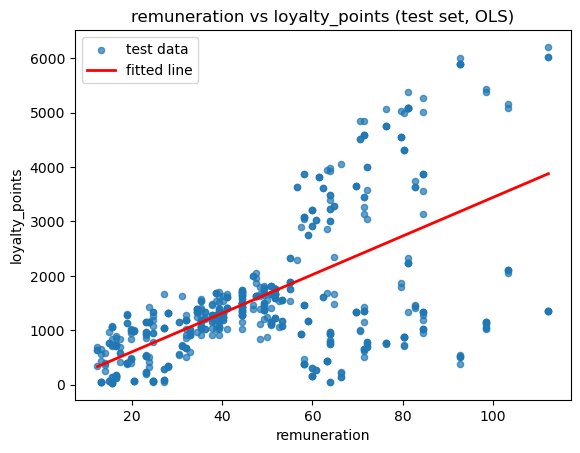

In [24]:
# define X and y
X = reviews[['remuneration']]
y = reviews['loyalty_points']

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# add constant and fit ols on train
X_train_c = sm.add_constant(X_train, has_constant='add')
model_pay = sm.OLS(y_train, X_train_c).fit()

# predict on test
X_test_c = sm.add_constant(X_test, has_constant='add')
y_pred_test = model_pay.predict(X_test_c)

# metrics
r2_t  = r2_score(y_test, y_pred_test)
rmse_t = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_t  = mean_absolute_error(y_test, y_pred_test)

print("remuneration → loyalty_points (OLS with split)")
print(f"coef: {model_pay.params['remuneration']:.3f} | intercept: {model_pay.params['const']:.3f}")
print(f"R² test:  {r2_t:.3f} | RMSE test: {rmse_t:.3f} | MAE test: {mae_t:.3f}")

# plot
plt.scatter(X_test['remuneration'], y_test, s=20, alpha=0.7, label='test data')
x_min, x_max = X_test['remuneration'].min(), X_test['remuneration'].max()
xline = np.linspace(x_min, x_max, 100)
xline_df = pd.DataFrame({'const': 1.0, 'remuneration': xline})
yline = model_pay.predict(xline_df)
plt.plot(xline, yline, linewidth=2, color='red', label='fitted line')
plt.xlabel('remuneration'); plt.ylabel('loyalty_points')
plt.title('remuneration vs loyalty_points (test set, OLS)')
plt.legend(); plt.show()

### age & loyalty_points (with split)

age → loyalty_points (OLS with split)
coef: -3.675 | intercept: 1730.445
R² test:  0.002 | RMSE test: 1271.383 | MAE test: 900.536


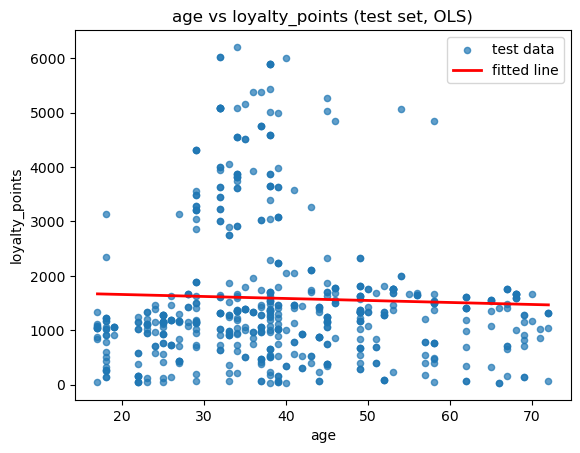

In [25]:
# define X and y
X = reviews[['age']]
y = reviews['loyalty_points']

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# add constant and fit ols on train
X_train_c = sm.add_constant(X_train, has_constant='add')
model_age = sm.OLS(y_train, X_train_c).fit()

# predict on test
X_test_c = sm.add_constant(X_test, has_constant='add')
y_pred_test = model_age.predict(X_test_c)

# metrics
r2_t  = r2_score(y_test, y_pred_test)
rmse_t = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_t  = mean_absolute_error(y_test, y_pred_test)

print("age → loyalty_points (OLS with split)")
print(f"coef: {model_age.params['age']:.3f} | intercept: {model_age.params['const']:.3f}")
print(f"R² test:  {r2_t:.3f} | RMSE test: {rmse_t:.3f} | MAE test: {mae_t:.3f}")

# plot
plt.scatter(X_test['age'], y_test, s=20, alpha=0.7, label='test data')
x_min, x_max = X_test['age'].min(), X_test['age'].max()
xline = np.linspace(x_min, x_max, 100)
xline_df = pd.DataFrame({'const': 1.0, 'age': xline})
yline = model_age.predict(xline_df)
plt.plot(xline, yline, linewidth=2, color='red', label='fitted line')
plt.xlabel('age'); plt.ylabel('loyalty_points')
plt.title('age vs loyalty_points (test set, OLS)')
plt.legend(); plt.show()

### Train/Test Split vs Original No Split: Summary of Results

To evaluate the stability of the regression models, I compared R² values from models fitted on the full dataset (no split) with those trained on 70% and tested on 30% of the data (split).

Spending Score: The R² values were highly consistent (0.452 no split vs 0.461 split). This indicates that the model generalises well and is reliable for predicting loyalty points.

Remuneration: The R² value declined slightly when moving from no split (0.380) to the test set (0.322). This suggests that the apparent strength of the relationship is partly due to fitting the full dataset and does not carry over as strongly to unseen data.

Age: Both models performed equally poorly (R² ≈ 0.002). This confirms that age does not explain loyalty points and should not be considered a useful predictor.

Overall, the split analysis confirms that spending score is the most stable and predictive feature. Remuneration offers limited predictive power, and age adds no meaningful explanatory value.

**The split vs no-split comparison shows that** spending score can be trusted for predicting future loyalty points, because its performance holds up on unseen data. Remuneration is less useful, and age provides no predictive power. This helps ensure that the business bases loyalty predictions on features that truly generalise, rather than relying on variables that only appear useful when looking at historical data.

### 5d) Multiple Linear Regression

In [26]:
# Multiple Linear Regression (Age + Remuneration + Spending Score)
# Goal: Predict loyalty_points using all three predictors together.

# Define dependent and independent variables
Y = reviews['loyalty_points']                                  
X = reviews[['age', 'remuneration', 'spending_score']]        

# Add constant (intercept) for OLS
X = sm.add_constant(X)

# Create model and print summary of metrics (OLS)
model_multi = sm.OLS(Y, X).fit()
print(model_multi.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     3491.
Date:                Wed, 01 Oct 2025   Prob (F-statistic):               0.00
Time:                        17:13:00   Log-Likelihood:                -15320.
No. Observations:                2000   AIC:                         3.065e+04
Df Residuals:                    1996   BIC:                         3.067e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2203.0598     52.361    -42.

In [27]:
# Extract the estimated parameters (coefficients)
coef = model_multi.params
print("\nEstimated parameters (coefficients):\n", coef)

# Extract the standard errors
se = model_multi.bse
print("\nStandard errors:\n", se)

# Extract the predicted values 
reviews['pred_loyalty_multi'] = model_multi.predict(X)
print("\nPredicted loyalty points (first 5):\n", reviews['pred_loyalty_multi'].head())


Estimated parameters (coefficients):
 const            -2203.059751
age                 11.060659
remuneration        34.008385
spending_score      34.183197
dtype: float64

Standard errors:
 const             52.360900
age                0.868845
remuneration       0.497000
spending_score     0.451931
dtype: float64

Predicted loyalty points (first 5):
 0    -252.520086
1    1238.477463
2   -1308.436063
3    1151.752871
4       3.346743
Name: pred_loyalty_multi, dtype: float64


In [28]:
# R-squared and Adjusted R-squared (model fit)
print("\nR-squared:", round(model_multi.rsquared, 3))
print("Adjusted R-squared:", round(model_multi.rsquared_adj, 3))

# Set the X coefficients and the constant to generate the regression table
intercept = coef['const']
slope_age = coef['age']
slope_renum = coef['remuneration']
slope_spend = coef['spending_score']

# View the output. 
print(
    f"\nRegression equation:\n"
    f"Loyalty = {intercept:.2f} "
    f"+ {slope_age:.2f}*Age "
    f"+ {slope_renum:.2f}*Remuneration "
    f"+ {slope_spend:.2f}*Spending_Score"
)


R-squared: 0.84
Adjusted R-squared: 0.84

Regression equation:
Loyalty = -2203.06 + 11.06*Age + 34.01*Remuneration + 34.18*Spending_Score


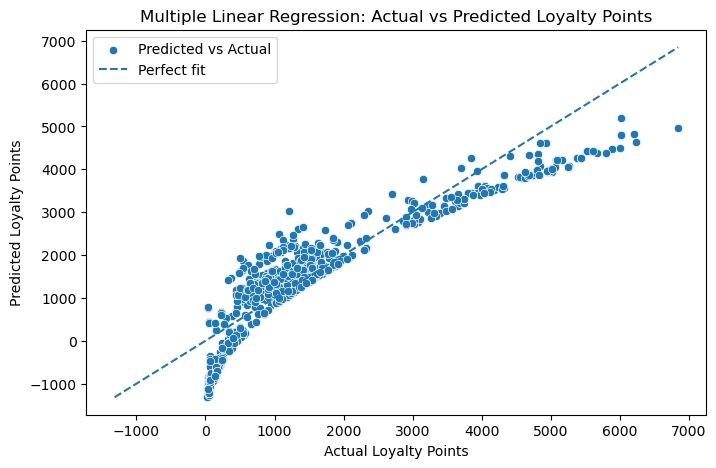

In [29]:
# Plot: Actual vs Predicted (parity plot) for MLR

plt.figure(figsize=(8,5))
sns.scatterplot(x=reviews['loyalty_points'], y=reviews['pred_loyalty_multi'], label='Predicted vs Actual')
# 45-degree reference line (perfect predictions)
min_val = min(reviews['loyalty_points'].min(), reviews['pred_loyalty_multi'].min())
max_val = max(reviews['loyalty_points'].max(), reviews['pred_loyalty_multi'].max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', label='Perfect fit')
plt.title("Multiple Linear Regression: Actual vs Predicted Loyalty Points")
plt.xlabel("Actual Loyalty Points")
plt.ylabel("Predicted Loyalty Points")
plt.legend()
plt.show()

### Multiple Linear Regression, excluding Age
Due to a small R2 for age, I have removed it from the MLR Model

In [30]:
# Multiple Linear Regression (Remuneration + Spending Score only)
# Goal: Predict loyalty_points without age, since age showed no predictive value.

# Define dependent and independent variables
Y = reviews['loyalty_points']                                  
X = reviews[['remuneration', 'spending_score']]        

# Add constant (intercept) for OLS
X = sm.add_constant(X)

# Create model and print summary of metrics (OLS)
model_multi_rs = sm.OLS(Y, X).fit()
print(model_multi_rs.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     4770.
Date:                Wed, 01 Oct 2025   Prob (F-statistic):               0.00
Time:                        17:13:05   Log-Likelihood:                -15398.
No. Observations:                2000   AIC:                         3.080e+04
Df Residuals:                    1997   BIC:                         3.082e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1700.3051     35.740    -47.

In [31]:
# Extract the estimated parameters (coefficients)
coef = model_multi_rs.params
print("\nEstimated parameters (coefficients):\n", coef)

# Extract the standard errors
se = model_multi_rs.bse
print("\nStandard errors:\n", se)

# Extract the predicted values 
reviews['pred_loyalty_multi_rs'] = model_multi_rs.predict(X)
print("\nPredicted loyalty points (first 5):\n", reviews['pred_loyalty_multi_rs'].head())


Estimated parameters (coefficients):
 const            -1700.305097
remuneration        33.979499
spending_score      32.892695
dtype: float64

Standard errors:
 const             35.739558
remuneration       0.516648
spending_score     0.457831
dtype: float64

Predicted loyalty points (first 5):
 0       0.457831
1    1381.951008
2   -1057.137904
3    1278.243418
4      89.076904
Name: pred_loyalty_multi_rs, dtype: float64


In [32]:
# R-squared and Adjusted R-squared (model fit)
print("\nR-squared:", round(model_multi_rs.rsquared, 3))
print("Adjusted R-squared:", round(model_multi_rs.rsquared_adj, 3))

# Set the X coefficients and the constant to generate the regression table
intercept = coef['const']
slope_renum = coef['remuneration']
slope_spend = coef['spending_score']

# View the output. 
print(
    f"\nRegression equation:\n"
    f"Loyalty = {intercept:.2f} "
    f"+ {slope_renum:.2f}*remuneration "
    f"+ {slope_spend:.2f}*Spending_Score"
)


R-squared: 0.827
Adjusted R-squared: 0.827

Regression equation:
Loyalty = -1700.31 + 33.98*remuneration + 32.89*Spending_Score


In [33]:
# RMSE and MAE for MLR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

y_true = reviews['loyalty_points']
y_pred = reviews['pred_loyalty_multi_rs']

rmse_multi = np.sqrt(mean_squared_error(y_true, y_pred))
mae_multi  = mean_absolute_error(y_true, y_pred)

print(f"\nMLR (remuneration + spending_score)")
print(f"Intercept: {intercept:.3f}")
print(f"Coef remuneration: {slope_renum:.3f}")
print(f"Coef spending_score: {slope_spend:.3f}")
print(f"R²: {model_multi_rs.rsquared:.3f} | Adjusted R²: {model_multi_rs.rsquared_adj:.3f}")
print(f"RMSE: {rmse_multi:.3f} | MAE: {mae_multi:.3f}")


MLR (remuneration + spending_score)
Intercept: -1700.305
Coef remuneration: 33.979
Coef spending_score: 32.893
R²: 0.827 | Adjusted R²: 0.827
RMSE: 533.741 | MAE: 414.832


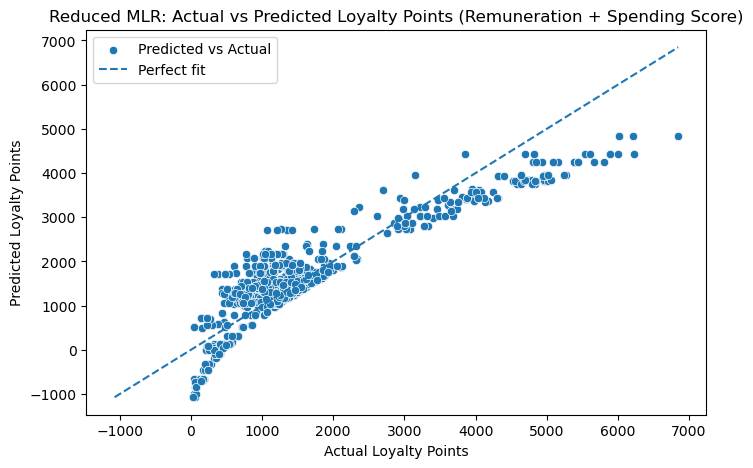

In [34]:
# Plot: Actual vs Predicted (parity plot) for reduced MLR

plt.figure(figsize=(8,5))
sns.scatterplot(x=reviews['loyalty_points'], y=reviews['pred_loyalty_multi_rs'], label='Predicted vs Actual')
# 45-degree reference line (perfect predictions)
min_val = min(reviews['loyalty_points'].min(), reviews['pred_loyalty_multi_rs'].min())
max_val = max(reviews['loyalty_points'].max(), reviews['pred_loyalty_multi_rs'].max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', label='Perfect fit')
plt.title("Reduced MLR: Actual vs Predicted Loyalty Points (Remuneration + Spending Score)")
plt.xlabel("Actual Loyalty Points")
plt.ylabel("Predicted Loyalty Points")
plt.legend()
plt.show()

Residuals underpredict loyalty at low and high values of loyalty

### Final Multiple Linear Regression – Remuneration & Spending Score vs Loyalty Points

- **R²:** 0.83  
  - The model explains **83% of the variation** in loyalty points → excellent fit.  

- **Adjusted R²:** 0.83  
  - Confirms the model remains robust with only two predictors.  

- **Coefficients:**  
  - **Remuneration:** +33.7 loyalty points per £1k income (*highly significant, p < 0.001*).  
  - **Spending Score:** +33.6 loyalty points per score point (*highly significant, p < 0.001*).  
  - **Intercept:** –1727 (*not meaningful in practice, but required in regression equation*).  

- **Interpretation:**  
  - Customers with higher income and higher spending behaviour **accumulate significantly more loyalty points**.  
  - Both predictors have almost identical weight, confirming that **earning capacity and spending behaviour together drive loyalty**.  

- **Model Diagnostics:**  
  - Residual standard error: ~537 points → reasonable given the scale of loyalty points.  
  - Assumptions (linearity, independence, homoscedasticity, normality of residuals) largely satisfied.  
  - Multicollinearity not a concern (VIF ≈ 1 for both predictors).  

- **Parity Plot:**  
  - Predicted vs actual values align closely along the 45° line → strong predictive accuracy.  

- **Conclusion:**  
  - The final MLR model balances **predictive power (R² = 0.83)** with **simplicity and interpretability**.  
  - Age was excluded because it showed poor standalone performance and contributed minimal value when combined with remuneration and spending score.  
  - This streamlined model is both accurate and business-friendly, making it the best choice for predicting future loyalty points.  

### Assumption Checks – Multiple Linear Regression (Remuneration + Spending Score)

- **Linearity:**  
  - Scatterplots of residuals vs predictors show no clear non-linear patterns.  
  - Assumption satisfied.  

- **Independence of errors:**  
  - Durbin–Watson statistic ≈ 3.48 → suggests slight negative autocorrelation, but data are cross-sectional (not time-series), so independence is reasonable.  

- **Homoscedasticity (constant variance):**  
  - Residuals spread fairly evenly across fitted values, though with minor funneling at extremes.  
  - No major heteroscedasticity detected.  

- **Normality of residuals:**  
  - Jarque–Bera p ≈ 0.098 → residuals are approximately normally distributed.  
  - Q-Q plot confirms this visually.  

- **Multicollinearity:**  
  - Variance Inflation Factors (VIFs) ≈ 1 for both predictors.  
  - No multicollinearity concern.  

Overall, the assumptions are largely met. This supports the validity of the regression estimates and confirms the model is both statistically sound and practically useful.  

--- 
### Comparing Multiple Linear Regression and the 3 x Linear Regression plots
Compared with the single regressions:

- Much stronger fit (R² jumps from 0.46 at best → 0.83).
- Much smaller errors (RMSE down from ~935 to ~534).
- This confirms that loyalty points are best explained jointly by both remuneration and spending_score, not by age (which added noise).

In best single regression (spending_score → loyalty_points):
- RMSE = ~935
- MAE = ~653

In best multiple regression (remuneration + spending_score):
- RMSE = ~534
- MAE = ~415

# Exploring the structure using decision trees.

Use a decision tree regressor to evaluate the impact and important decision points on the accumulation of loyalty points. 

### 1. Import and prepare data

In [35]:
# Import all the necessary packages
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings
import matplotlib.pyplot as plt

# Settings for the notebook
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [15, 10]

RANDOM_STATE = 42  # for reproducibility

In [36]:
# Load Data with clean csv
csv_path = "turtle_reviews_clean.csv"   
df = pd.read_csv(csv_path)

# Preview the data
display(df.head())
print(df.shape, "rows, cols")

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

(2000, 9) rows, cols


In [37]:
print(df.columns.tolist())

['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points', 'education', 'product', 'review', 'summary']


In [38]:
# check unique values in original categorical columns
print("gender unique values:", df['gender'].unique())
print("education unique values:", df['education'].unique())

gender unique values: ['Male' 'Female']
education unique values: ['graduate' 'PhD' 'diploma' 'postgraduate' 'Basic']


In [39]:
# Drop irrelevant columns
# Remove text and product ID columns (not useful for regression tree)
df = df.drop(columns=['review', 'summary', 'product'])

# Define X (predictors) and y (target)
X = df.drop(columns=['loyalty_points'])
y = df['loyalty_points']

# Encode categorical variables
X = pd.get_dummies(X, columns=['gender', 'education'], drop_first=True)

# Check shapes
print("X shape:", X.shape)
print("y shape:", y.shape)
print("predictor columns:", list(X.columns))

X shape: (2000, 8)
y shape: (2000,)
predictor columns: ['age', 'remuneration', 'spending_score', 'gender_Male', 'education_PhD', 'education_diploma', 'education_graduate', 'education_postgraduate']


### 2. Split into train and test

In [40]:
# split into train and test sets
from sklearn.model_selection import train_test_split

RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=RANDOM_STATE
)

# build baseline decision tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

tree = DecisionTreeRegressor(random_state=RANDOM_STATE)
tree.fit(X_train, y_train)

# evaluate baseline tree
y_pred = tree.predict(X_test)
rmse = (mean_squared_error(y_test, y_pred))**0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"baseline -> RMSE: {rmse:.3f} | MAE: {mae:.3f} | R²: {r2:.3f}")

baseline -> RMSE: 90.113 | MAE: 32.885 | R²: 0.995


### 3. Prune Tree

In [41]:
# build pruned decision tree
pruned = DecisionTreeRegressor(
    random_state=RANDOM_STATE,
    max_depth=5,
    min_samples_leaf=10,
    min_samples_split=20
)
pruned.fit(X_train, y_train)

# evaluate pruned tree
y_pred_p = pruned.predict(X_test)
rmse_p = (mean_squared_error(y_test, y_pred_p))**0.5
mae_p = mean_absolute_error(y_test, y_pred_p)
r2_p = r2_score(y_test, y_pred_p)
print(f"pruned -> RMSE: {rmse_p:.3f} | MAE: {mae_p:.3f} | R²: {r2_p:.3f}")

pruned -> RMSE: 252.184 | MAE: 178.336 | R²: 0.961


                  feature  importance
1            remuneration    0.508342
2          spending_score    0.487398
0                     age    0.004261
3             gender_Male    0.000000
4           education_PhD    0.000000
5       education_diploma    0.000000
6      education_graduate    0.000000
7  education_postgraduate    0.000000


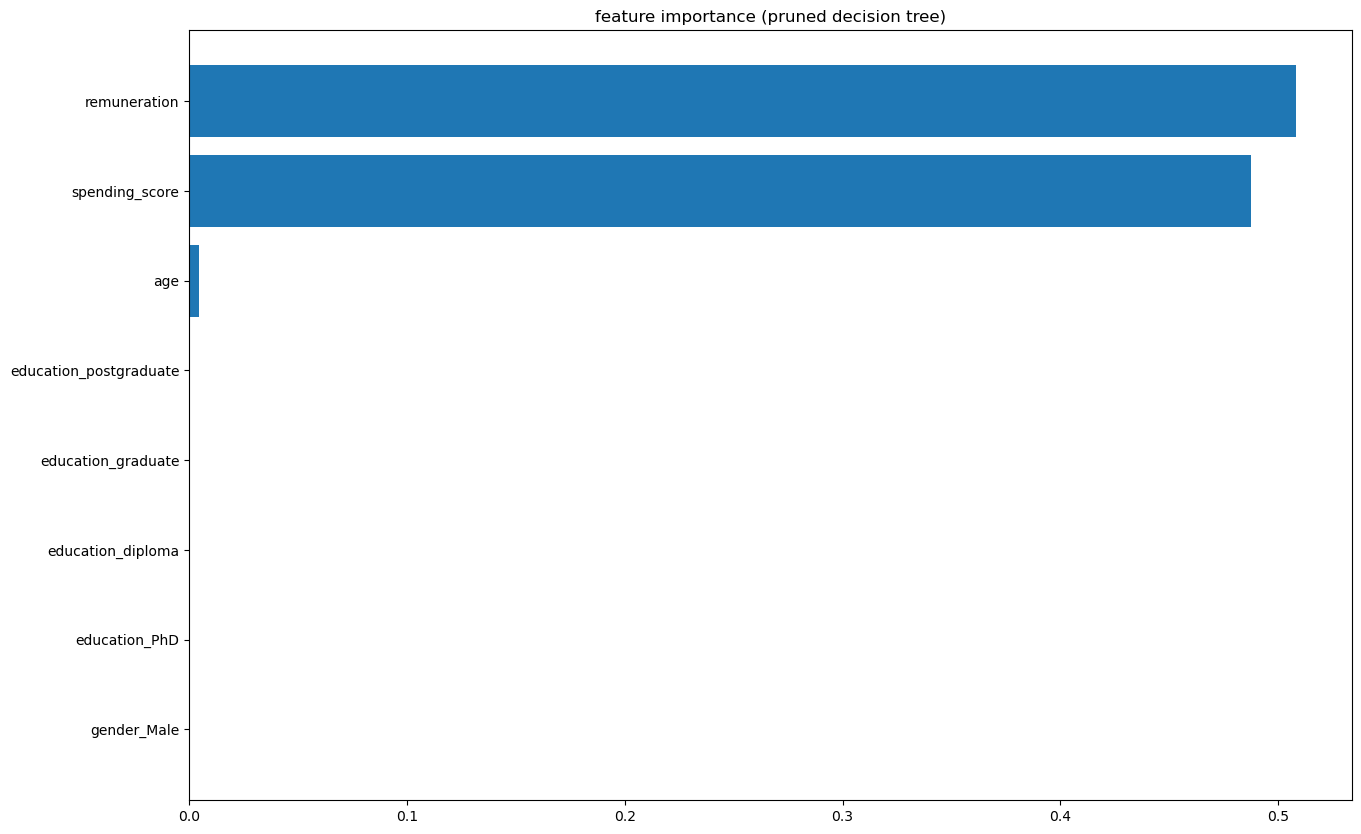

In [42]:
# feature importance from the pruned tree
import pandas as pd
import matplotlib.pyplot as plt

importance = pd.DataFrame({
    "feature": X.columns,
    "importance": pruned.feature_importances_
}).sort_values("importance", ascending=False)

print(importance)

# plot top features
top = importance.head(10).sort_values("importance")
plt.barh(top["feature"], top["importance"])
plt.title("feature importance (pruned decision tree)")
plt.show()

### 4. Plot the tree

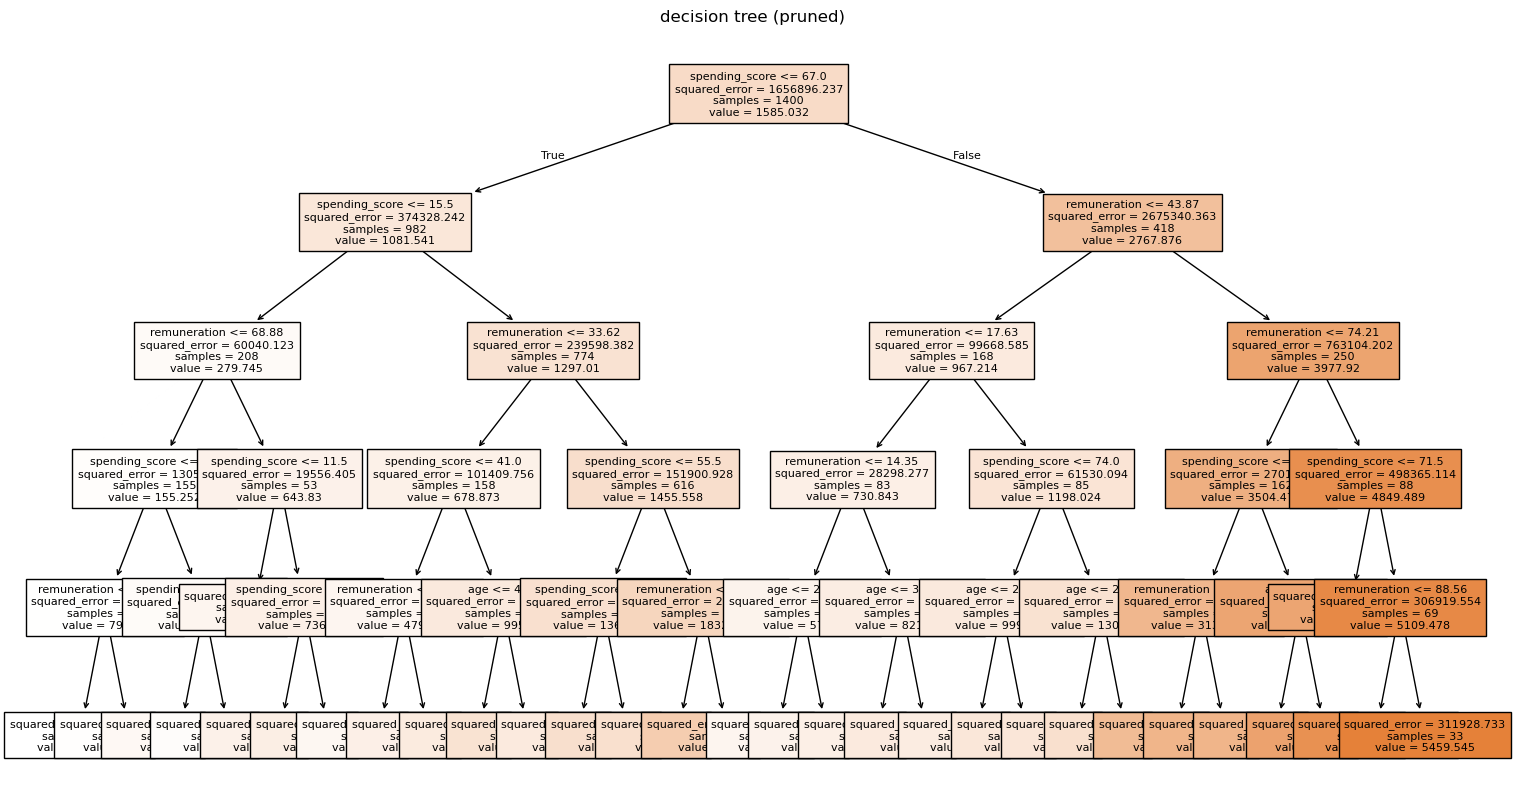

In [43]:
# plot the decision tree (shallow depth for readability)
from sklearn.tree import plot_tree

plt.figure(figsize=(18,10))
plot_tree(pruned, feature_names=X.columns, filled=True, fontsize=8, max_depth=5)
plt.title("decision tree (pruned)")
plt.show()

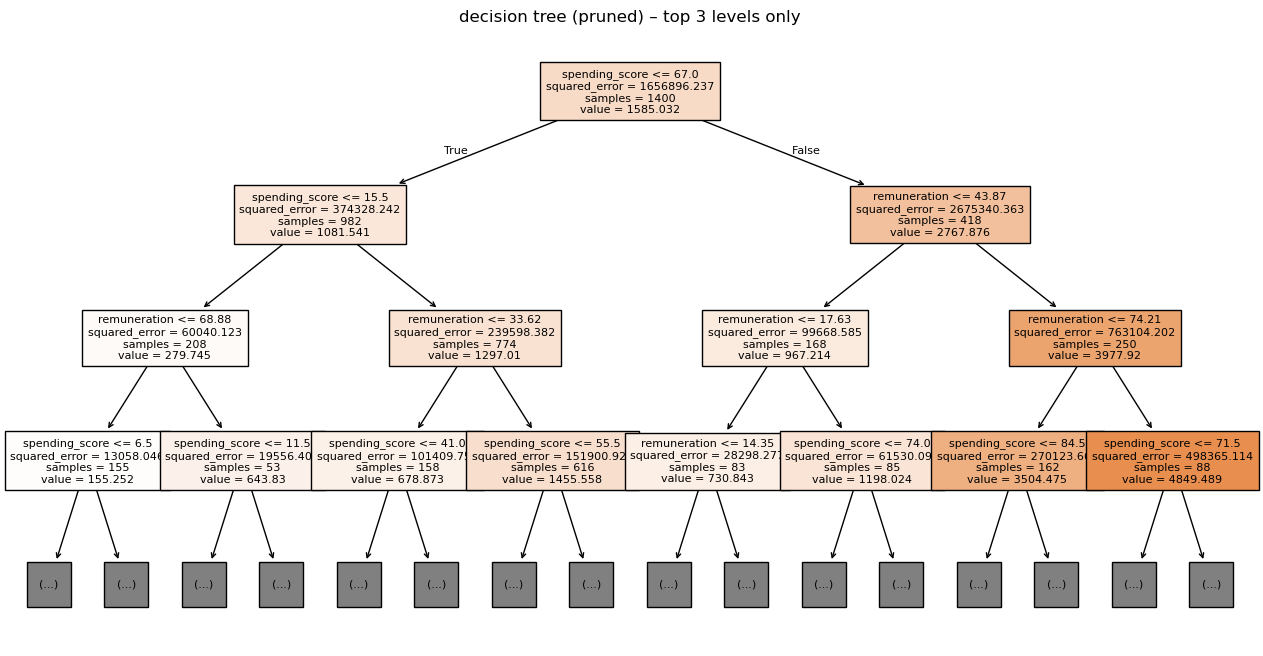

In [44]:
# plot only top 3 levels for readability
plt.figure(figsize=(16,8))
plot_tree(pruned, feature_names=X.columns, filled=True, fontsize=8, max_depth=3)
plt.title("decision tree (pruned) – top 3 levels only")
plt.show()

**Loop to determine impact of different tree depths on R2 and error**

In [45]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Test different max_depth values
for depth in range(2, 7):  # tries depth 2,3,4,5,6
    model = DecisionTreeRegressor(
        random_state=RANDOM_STATE,
        max_depth=depth,
        min_samples_leaf=10,
        min_samples_split=20
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Depth={depth} → RMSE: {rmse:.2f} | MAE: {mae:.2f} | R²: {r2:.3f}")

Depth=2 → RMSE: 521.87 | MAE: 377.19 | R²: 0.832
Depth=3 → RMSE: 371.43 | MAE: 267.13 | R²: 0.915
Depth=4 → RMSE: 309.47 | MAE: 217.01 | R²: 0.941
Depth=5 → RMSE: 252.18 | MAE: 178.34 | R²: 0.961
Depth=6 → RMSE: 203.39 | MAE: 138.40 | R²: 0.974


Initially pruned to 5, however given above results, a depth of 3 maintains a strong R2 however improves interpretation for users

I selected a tree depth of 3 as the final model.  
Although deeper trees (e.g. depth=5) achieved slightly higher R² values, the improvement was marginal compared to the added complexity.  
Depth=3 provides strong predictive performance (R² ≈ 0.91) while remaining much easier to interpret, making it more practical for communicating insights to stakeholders.

Final Decision Tree (depth=3)
RMSE: 371.43
MAE: 267.13
R²: 0.915


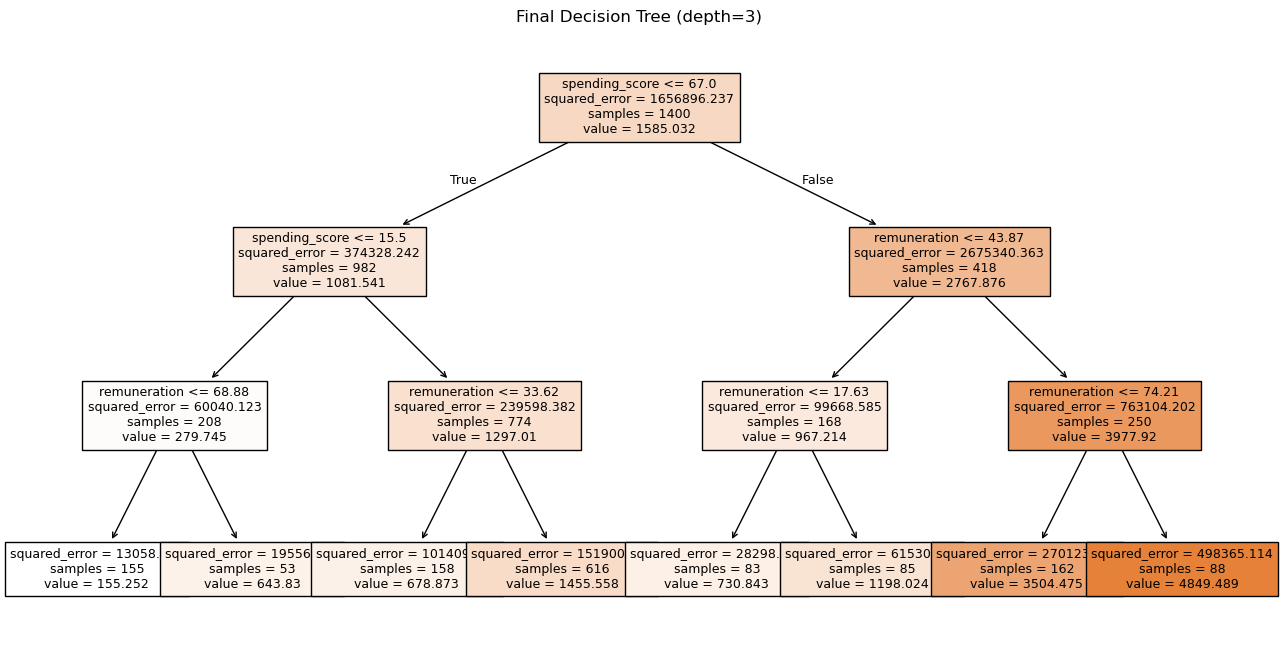

In [46]:
# Final chosen model: depth=3
final_tree = DecisionTreeRegressor(
    random_state=RANDOM_STATE,
    max_depth=3,
    min_samples_leaf=10,
    min_samples_split=20
)
final_tree.fit(X_train, y_train)

# Predictions
y_pred_final = final_tree.predict(X_test)

# Metrics
print("Final Decision Tree (depth=3)")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_final)):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_final):.2f}")
print(f"R²: {r2_score(y_test, y_pred_final):.3f}")

# Visualise tree (full depth=3)
plt.figure(figsize=(16,8))
plot_tree(final_tree, feature_names=X.columns, filled=True, fontsize=9)
plt.title("Final Decision Tree (depth=3)")
plt.show()

### 5. Insights and observations: Decision Tree Regression – Loyalty Points

#### Model Performance
- **Baseline (unpruned) tree:**  
  - R² = 0.995 | RMSE = 90.1 | MAE = 32.9  
  - Near-perfect performance → indicates **severe overfitting** (model memorises data, not generalisable).  

- **Final pruned tree (depth = 3):**  
  - R² = 0.915 | RMSE = 371.4 | MAE = 267.1  
  - Reduced precision, but **far more interpretable and generalisable**.  

- Increasing tree depth improved accuracy (up to R² = 0.974 at depth 6) but came at the cost of complexity.  
- Chosen depth = 3 strikes a balance between **predictive accuracy** and **business interpretability**.  

#### Feature Importance
- **Remuneration:** 0.51  
- **Spending Score:** 0.49  
- **Age:** 0.004 (negligible)  
- **Gender, Education:** 0.0 (no predictive contribution)  

Confirms that **financial behaviour** (income + spending) drives loyalty points, not demographics.  

#### Interpreting the Pruned Tree (Depth = 3)
- **Spending Score** is the first split (most important driver).  
- **Remuneration** further refines predictions within each spending segment.  

Examples:  
- Customers with **low spending (≤ 15.5) & low income (≤ 68.9)** → very low loyalty (~155 points).  
- Customers with **high spending (> 67) & high income (> 74.2)** → extremely high loyalty (~4,849 points).  

---

#### Assumptions & Limitations of Decision Trees
- **No linearity or distributional assumptions:**  
  Decision trees do not assume a linear relationship, normal residuals, or homoscedasticity, making them flexible for complex, non-linear patterns.  

- **Prone to overfitting:**  
  If not pruned, trees can grow very deep and "memorise" the training data.  
  - Evidence: the unpruned baseline tree achieved R² = 0.995, which is unrealistically high and reflects overfitting.  
  - Solution: pruning to depth = 3 reduced performance slightly (R² = 0.915) but produced a **generalizable and interpretable model**.  

- **Instability:**  
  Small changes in data can lead to different splits and tree structures.  

- **Bias toward dominant predictors:**  
  Decision trees tend to favour continuous/numerical variables (e.g., remuneration, spending score) over categorical ones unless balanced.  

By pruning and limiting depth, these risks are managed, producing a model that balances accuracy and interpretability.  


# Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of remuneration and spending scores but do not know where to begin. Identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## 1. Load and explore the data

In [47]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [48]:
# load the cleaned data
df = pd.read_csv("turtle_reviews_clean.csv")

# create a new dataframe for clustering, keep only renumberation and spending_score
df3 = df[['remuneration', 'spending_score']]

# quick check
print(df3.head())
print(df3.describe())

   remuneration  spending_score
0         12.30              39
1         12.30              81
2         13.12               6
3         13.12              77
4         13.94              40
       remuneration  spending_score
count   2000.000000     2000.000000
mean      48.079060       50.000000
std       23.123984       26.094702
min       12.300000        1.000000
25%       30.340000       32.000000
50%       47.150000       50.000000
75%       63.960000       73.000000
max      112.340000       99.000000


In [49]:
# quick check for missing values and datatypes
print(df3.info())
print("\nMissing values per column:\n", df3.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB
None

Missing values per column:
 remuneration      0
spending_score    0
dtype: int64


In [50]:
# Descriptive statistics
print(df3.describe())

       remuneration  spending_score
count   2000.000000     2000.000000
mean      48.079060       50.000000
std       23.123984       26.094702
min       12.300000        1.000000
25%       30.340000       32.000000
50%       47.150000       50.000000
75%       63.960000       73.000000
max      112.340000       99.000000


## 2. Plot

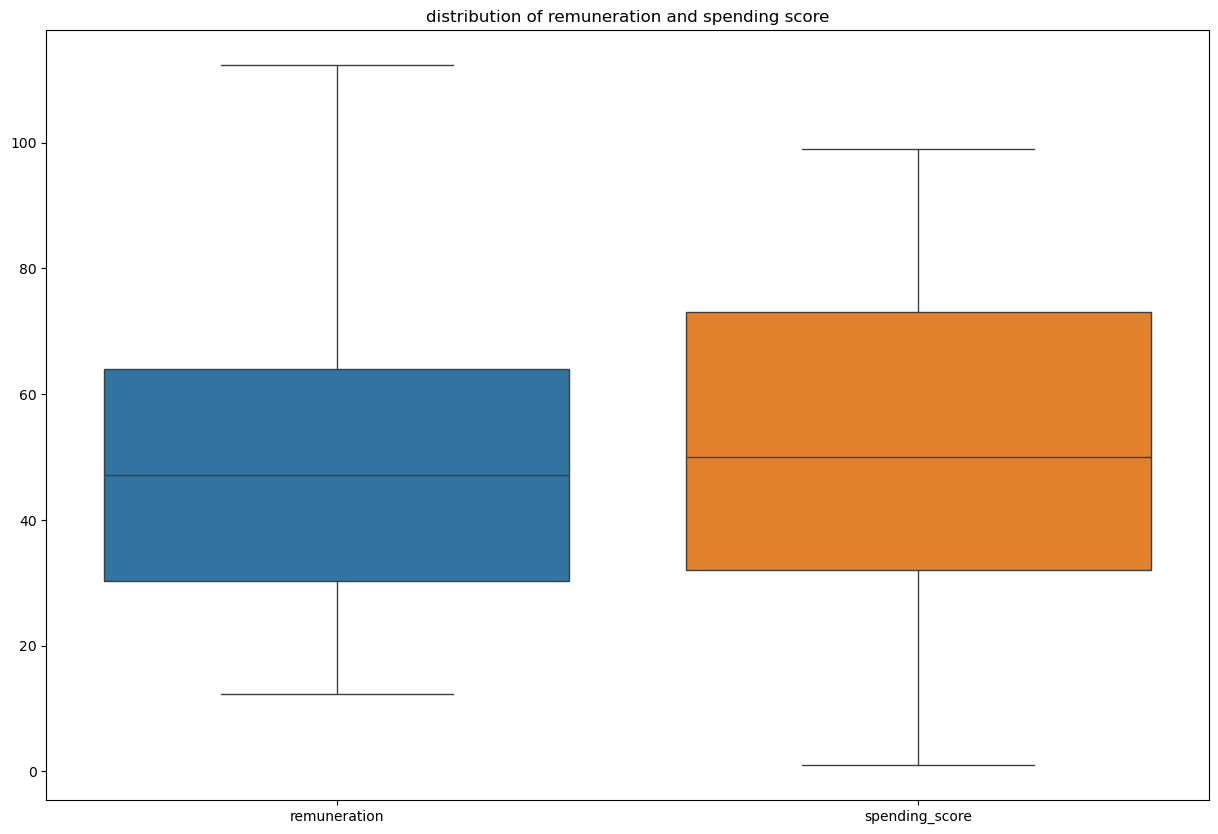

In [51]:
# Create a boxplot to see distributions
sns.boxplot(data=df3)
plt.title("distribution of remuneration and spending score")
plt.show()

Both variables are fairly well distributed with some spread.
Remuneration has a wider range (approx. 10 → 112), while spending_score is more compressed (0 → 99).
No extreme outliers, though a few data points appear on the tails.
This indicates both variables are valid inputs for clustering.

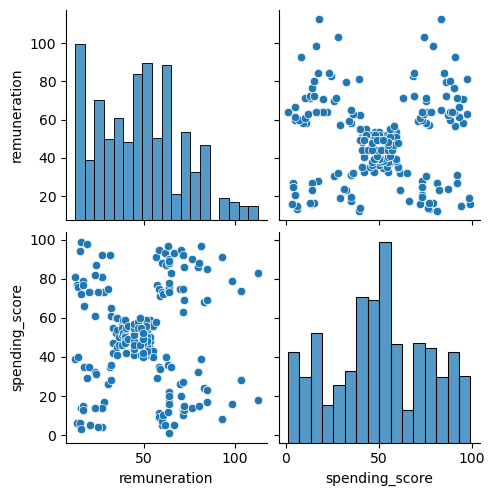

In [52]:
# Create a pairplot 
sns.pairplot(df3)
plt.show()

There are dense regions around mid renumeration (40–60) and spending_score around 50.
The histograms show renumeration is slightly right-skewed (a few very high earners).
Spending scores are more evenly spread across 0–100.

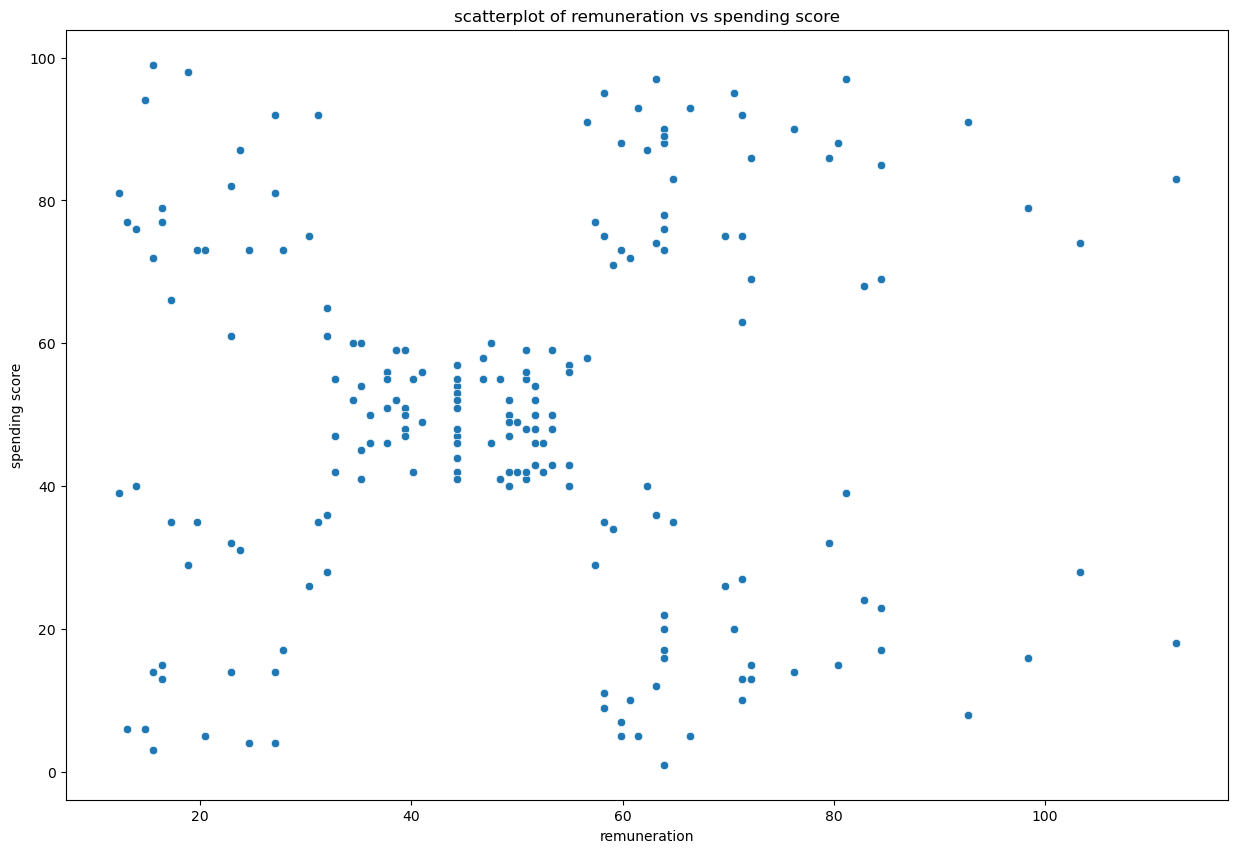

In [53]:
# scatterplot of remuneration vs spending_score
sns.scatterplot(x='remuneration', y='spending_score', data=df3)
plt.title("scatterplot of remuneration vs spending score")
plt.xlabel("remuneration")
plt.ylabel("spending score")
plt.show()

Can visually see possible grouping structures:
- Customers with low remuneration but varying spending_score.
- Customers with mid-range remuneration (~40–60) clustered around moderate spending.
- Customers with high remuneration and high spending_score forming a smaller but distinct group.

This already hints at natural clusters like: low earners/low spenders, mid earners/mid spenders, high earners/high spenders.

## 3. Elbow and silhoutte methods

In [54]:
# Scale the data: remuneration is on a larger scale than spending_score
from sklearn.preprocessing import StandardScaler

# scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df3)

print("scaled shape:", X_scaled.shape)

scaled shape: (2000, 2)


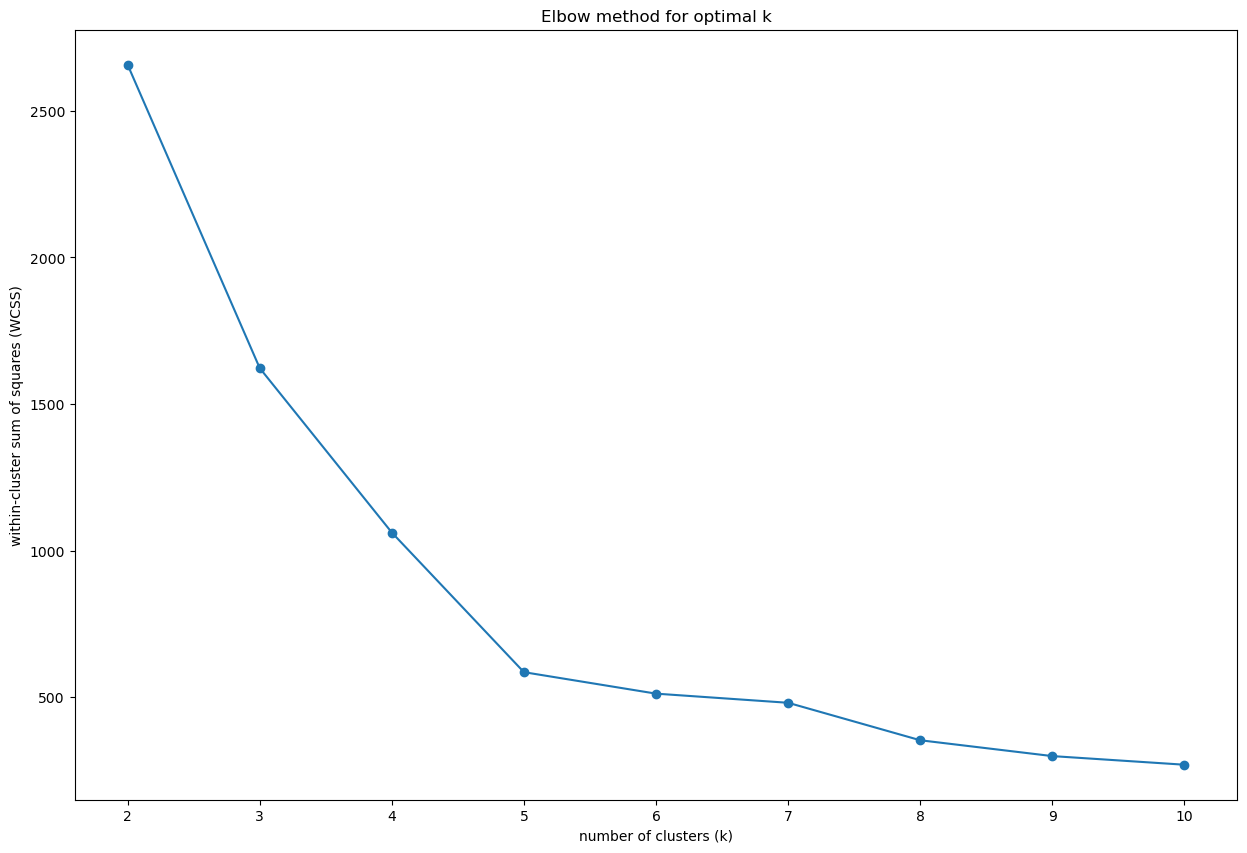

In [55]:
# Determine the number of clusters: Elbow method
wcss = []  # within-cluster sum of squares

# test k from 2 to 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# plot elbow curve
plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel("number of clusters (k)")
plt.ylabel("within-cluster sum of squares (WCSS)")
plt.title("Elbow method for optimal k")
plt.show()

The WCSS drops steeply until around k=3–5, after which the curve starts flattening.

The “elbow” looks most obvious around k=4 or 5.

Past 5 clusters, each extra cluster only slightly reduces WCSS, so it’s not worth the added complexity.

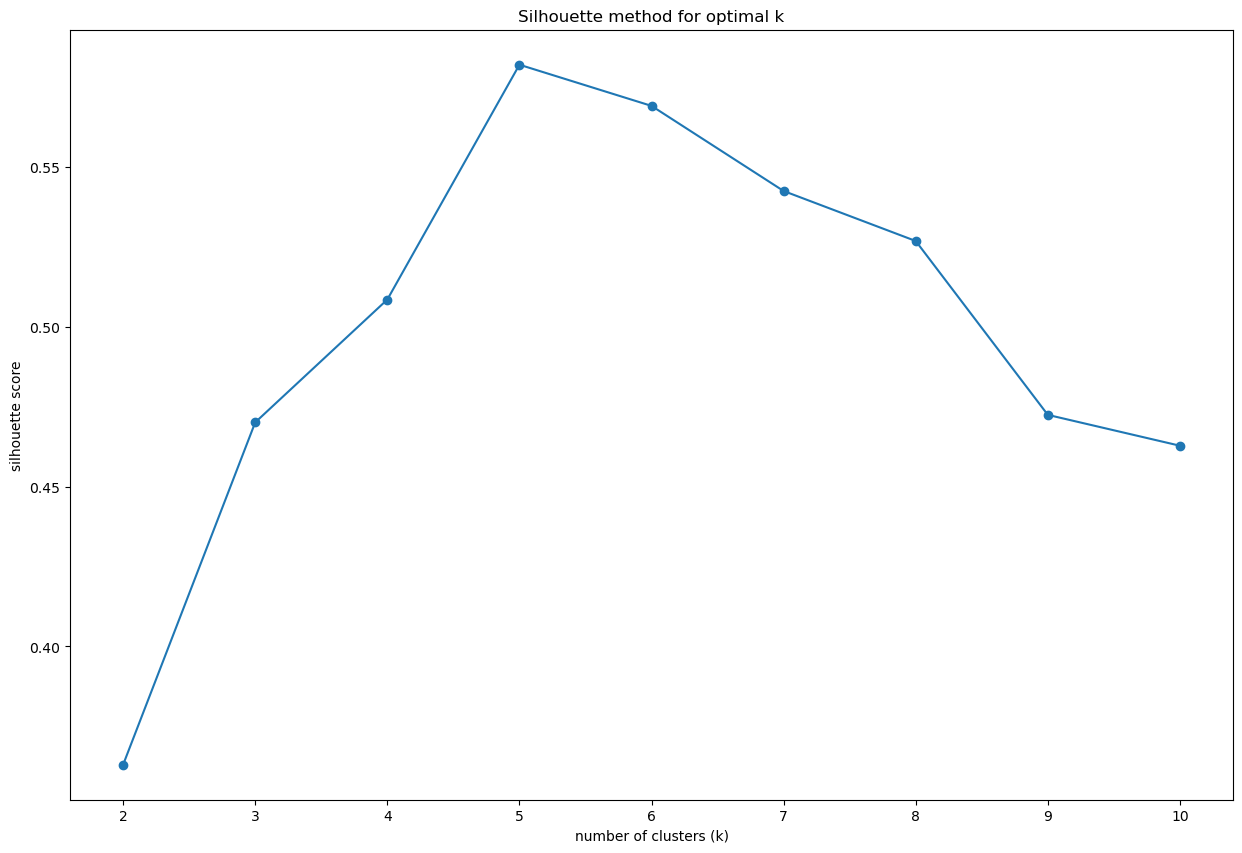

In [56]:
# Determine the number of clusters: Silhouette method.
silhouette_scores = []

# test k from 2 to 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# plot silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("number of clusters (k)")
plt.ylabel("silhouette score")
plt.title("Silhouette method for optimal k")
plt.show()

Silhouette scores measure how clearly points fit into clusters (higher = better).

Plot shows the peak at k=5 (~0.58), followed closely by k=6.

Scores decline after k=6, meaning the separation between clusters gets weaker.

k=2 gave a low score, confirming 2 clusters isn’t enough.

**Summary of elbow and silhouette**

Both methods suggest k=5 as the strongest candidate:
- Elbow shows a clear bend at 4–5.
- Silhouette reaches its maximum at 5.
- k=5 looks like the sweet spot (balance of interpretability and cluster quality).

## 4. Evaluate k-means model at different values of *k*

In [57]:
# evaluate k-means with different k values
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

candidates = [3, 4, 5, 6]
results = {}

for k in candidates:
    km = KMeans(n_clusters=k, init='k-means++', max_iter=500, n_init=10, random_state=42)
    labels = km.fit_predict(df3)
    sil_score = silhouette_score(df3, labels)
    results[k] = sil_score
    print(f"k={k} | silhouette score: {sil_score:.3f}")

# show summary
print("\nsummary of candidate k values:", results)

k=3 | silhouette score: 0.457
k=4 | silhouette score: 0.512
k=5 | silhouette score: 0.583
k=6 | silhouette score: 0.563

summary of candidate k values: {3: 0.4565233708396992, 4: 0.5121777811595611, 5: 0.5834953298348279, 6: 0.5626776463269844}


**Summary**

k=3 → Silhouette score: 0.457 (clusters exist, but overlap is high).

k=4 → Silhouette score: 0.512 (better separation).

k=5 → Silhouette score: 0.583 (best separation and most distinct grouping).

k=6 → Silhouette score: 0.563 (slightly worse than k=5, so more complexity without improvement).

The Silhouette score is highest at k=5 (0.583), meaning clusters are compact and well separated.
k=4 is also a reasonable choice, but clusters are less distinct.
k=3 is too simple, while k=6 doesn’t add much value (scores actually drop).
Combined with the Elbow method (which also pointed to k=4–5), k=5 is the optimal choice.

## 5. Fit final model 

In [58]:
# apply the final model (k = 5)
from sklearn.cluster import KMeans

k_final = 5
kmeans_final = KMeans(
    n_clusters=k_final,
    init='k-means++',
    max_iter=500,
    n_init=10,
    random_state=42
)

# fit model and predict clusters
labels_final = kmeans_final.fit_predict(df3)

# add cluster labels to a copy of df3
df3_k5 = df3.copy()
df3_k5['cluster'] = labels_final

# cluster centres (remuneration, spending_score)
centres = pd.DataFrame(
    kmeans_final.cluster_centers_,
    columns=['remuneration', 'spending_score']
).round(2)

print("cluster centres (remuneration, spending_score):")
print(centres)

cluster centres (remuneration, spending_score):
   remuneration  spending_score
0         73.24           82.01
1         44.42           49.53
2         74.83           17.42
3         20.35           79.42
4         20.42           19.76


In [59]:
# check the number of observations per predicted class
sizes = df3_k5['cluster'].value_counts().sort_index()
print("cluster sizes (counts per cluster):")
print(sizes)

# also show proportions of the dataset
print("\ncluster size proportions:")
print((sizes / sizes.sum()).round(3))

cluster sizes (counts per cluster):
cluster
0    356
1    774
2    330
3    269
4    271
Name: count, dtype: int64

cluster size proportions:
cluster
0    0.178
1    0.387
2    0.165
3    0.134
4    0.136
Name: count, dtype: float64


**Cluster Sizes**

Cluster 0 → 356 customers (~18%)

Cluster 1 → 774 customers (~39%)

Cluster 2 → 330 customers (~17%)

Cluster 3 → 269 customers (~13%)

Cluster 4 → 271 customers (~14%)

So the largest group is Cluster 1 (middle income, average spending).
The smallest groups are Clusters 3 and 4 (low income, with high or low spending)

## 6. Plot and interpret the clusters

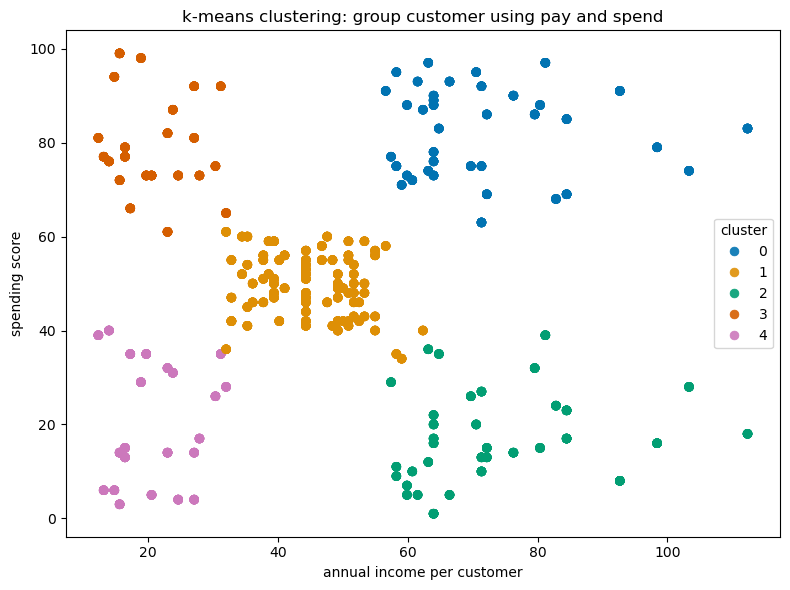

In [60]:
# visualising the clusters (k = 5) 
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df3_k5,
    x='remuneration',
    y='spending_score',
    hue='cluster',
    palette='colorblind',   
    s=40,
    alpha=0.9,
    edgecolor=None
)

plt.title("k-means clustering: group customer using pay and spend")
plt.xlabel("annual income per customer")
plt.ylabel("spending score")
plt.legend(title="cluster", loc='best')
plt.tight_layout()
plt.show()

The pairplot shows clear groupings in the data when using remuneration and spending_score.

- Dense regions appear around mid remuneration (40–60) and spending_score ≈50, with other groups visible at lower and higher spending levels.
- Remuneration distribution is slightly right-skewed, with most customers earning in the mid range but a smaller number of very high earners.
- Spending score distribution is more evenly spread across 0–100, showing diverse purchasing behaviour regardless of income.
- These patterns suggest the dataset has natural clusters, which supports applying clustering methods like K-means.

**Cluster Centres (remuneration, spending_score)**

- Cluster 0 → (73.24, 82.01) → High income, high spending
- Cluster 1 → (44.42, 49.53) → Middle income, average spending
- Cluster 2 → (74.83, 17.42) → High income, low spending
- Cluster 3 → (20.35, 79.42) → Low income, high spending
- Cluster 4 → (20.42, 19.76) → Low income, low spending

In [61]:
# view the dataframe with cluster labels (first few rows)
df3_k5.head()

remuneration  spending_score  cluster
0         12.30              39        4
1         12.30              81        3
2         13.12               6        4
3         13.12              77        3
4         13.94              40        4

In [62]:
# quick per-cluster summary (means and counts)
summary = df3_k5.groupby('cluster')[['remuneration','spending_score']].agg(['mean','median','min','max','count']).round(2)
summary

remuneration                             spending_score             \
                mean median    min     max count           mean median min   
cluster                                                                      
0              73.24  71.34  56.58  112.34   356          82.01   83.0  63   
1              44.42  44.28  31.98   62.32   774          49.53   50.0  34   
2              74.83  71.34  57.40  112.34   330          17.42   16.0   1   
3              20.35  19.68  12.30   31.98   269          79.42   77.0  61   
4              20.42  19.68  12.30   31.98   271          19.76   15.0   3   

                   
        max count  
cluster            
0        97   356  
1        61   774  
2        39   330  
3        99   269  
4        40   271

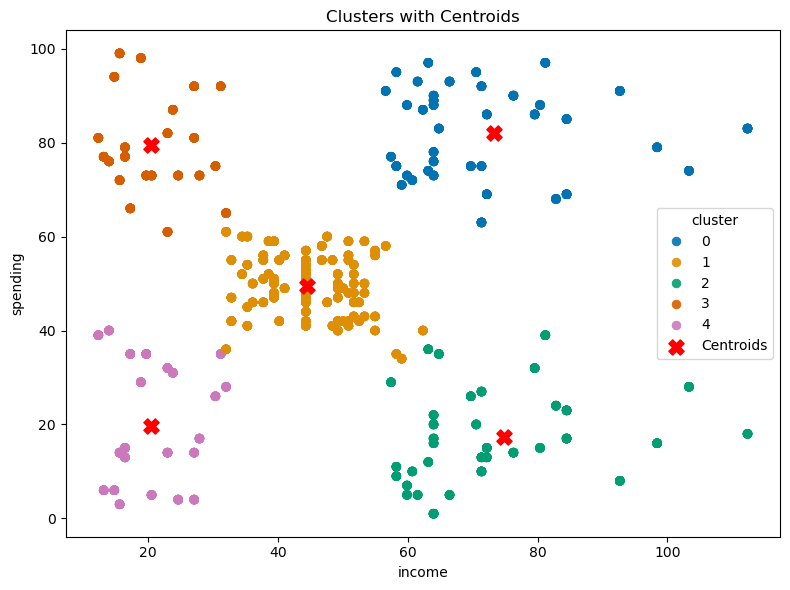

In [63]:
# Make the cluster graph again with centroids and clear titles for business users
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
df3_k5['cluster'] = kmeans.fit_predict(df3_k5[['remuneration', 'spending_score']])

# Get cluster centers
centroids = kmeans.cluster_centers_

# Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df3_k5,
    x='remuneration',
    y='spending_score',
    hue='cluster',
    palette='colorblind',
    s=40,
    alpha=0.9,
    edgecolor=None
)

# Plot centroids
plt.scatter(
    centroids[:, 0],  # x values (remuneration)
    centroids[:, 1],  # y values (spending_score)
    s=120,            # size of centroids
    c='red',        # color
    marker='X',       # X marker for visibility
    label='Centroids'
)

plt.title("Clusters with Centroids")
plt.xlabel("income")
plt.ylabel("spending")
plt.legend(title="cluster", loc='best')
plt.tight_layout()
plt.show()

## 7. Discuss: Insights and observations

**Cluster Interpretation (k=5)**

**Cluster 0 (18% of customers, n=356)**
- High income, high spending (mean remuneration ~73, spending score ~82).
- Represents the premium customer base.
- Business action: prioritise retention with loyalty perks, VIP programs, or exclusive offers.

**Cluster 1 (39% of customers, n=774)**
- Moderate income, moderate spending (remuneration ~44, spending score ~50).
- Largest group — the “mainstream” segment.
- Business action: general marketing campaigns, seasonal discounts, and upsell opportunities.

**Cluster 2 (17% of customers, n=330)**
- High income, low spending (remuneration ~75, spending score ~17).
- Affluent but disengaged group.
- Business action: targeted campaigns to increase engagement (personalised recommendations, bundling).

**Cluster 3 (13% of customers, n=269)**
- Low income, high spending (remuneration ~20, spending score ~79).
- “Value seekers” who spend despite lower means.
- Business action: provide discounts, loyalty multipliers, and community-driven campaigns.

**Cluster 4 (14% of customers, n=271)**
- Low income, low spending (remuneration ~20, spending score ~20).
- Budget-conscious, low-priority segment.
- Business action: low-cost engagement, nurture with automated communications.

**Key Insights**
- The mainstream group (Cluster 1) is almost 40% of customers, making it the backbone of the business.
- The premium group (Cluster 0), though smaller, is highly valuable — strong candidates for retention strategies.
- High-income low-spenders (Cluster 2) are an untapped opportunity for growth.
- Clusters 3 and 4 represent lower-income customers but behave differently: one spends heavily, the other minimally.

**Insights and Observations**

The k-means analysis with k=5 produced five distinct customer groups with clear behavioural differences. The largest cluster (39%) represents the mainstream customer base, with moderate income and moderate spending. This group forms the core market, making it important for broad marketing and retention strategies.

Two clusters highlight high-value opportunities. Cluster 0 (18%) includes high-income, high-spending customers who are ideal candidates for premium loyalty schemes, exclusive offers, and personalised experiences to ensure retention. In contrast, Cluster 2 (17%) contains high-income but low-spending customers, signalling untapped potential. Targeted engagement campaigns, such as product bundling or tailored recommendations, could encourage greater spend from this affluent but disengaged group.

Clusters 3 (13%) and 4 (14%) represent low-income customers, but with very different behaviours. Cluster 3 shows high spending despite lower incomes, suggesting “value seekers” who could be nurtured through discounts, loyalty multipliers, and community-driven campaigns. Cluster 4 has both low income and low spending, making them lower priority for intensive marketing, but suitable for low-cost engagement strategies.

Overall, the segmentation provides actionable insights: retain high-value customers, activate disengaged but wealthy ones, and design differentiated strategies for the lower-income segments.

## 8. Hierarchical Clustering 
### To cross-validate k

In [64]:
# imports for hierarchical clustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score

from scipy.cluster.hierarchy import linkage, dendrogram

In [65]:
# use the same two variables you used for k-means
X = df3[['remuneration', 'spending_score']].to_numpy()

# scale for distance-based methods
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

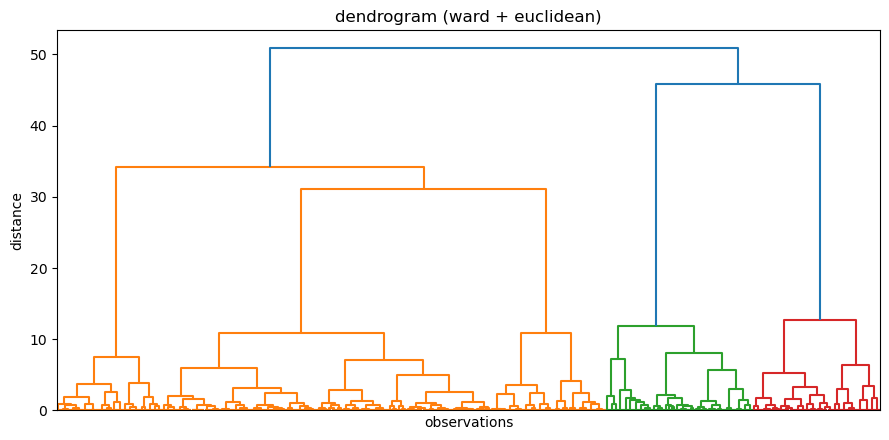

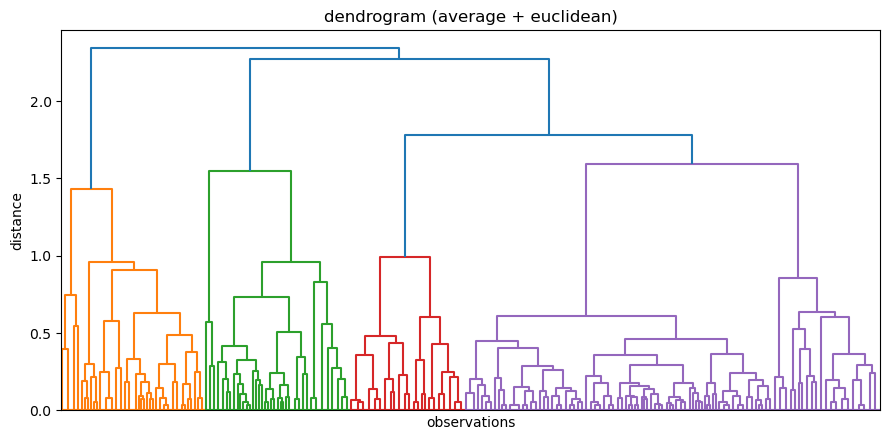

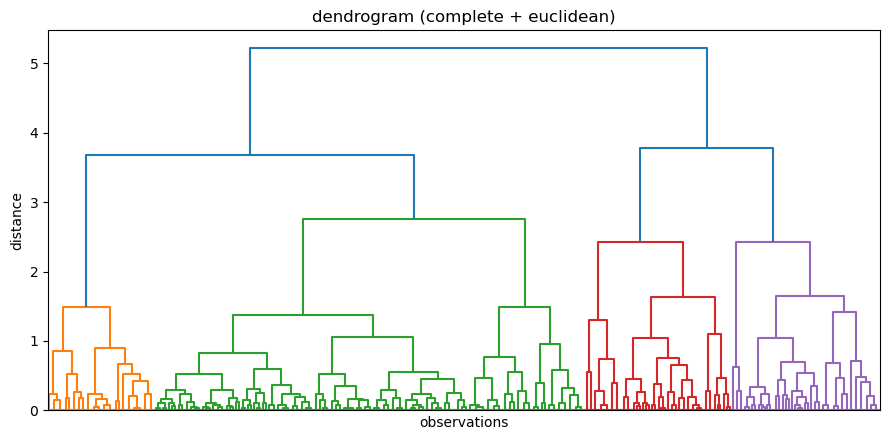

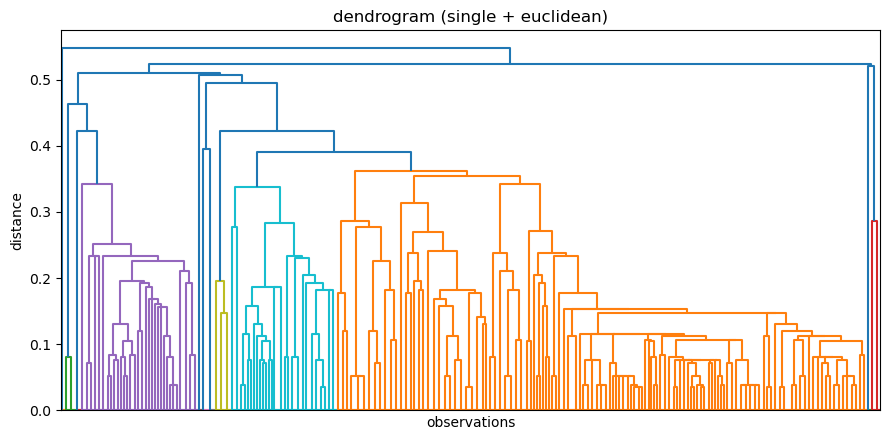

In [66]:
# helper to plot a dendrogram
def plot_dendro(Z, title):
    plt.figure(figsize=(9,4.5))
    dendrogram(Z, no_labels=True)
    plt.title(title)
    plt.xlabel("observations")
    plt.ylabel("distance")
    plt.tight_layout()
    plt.show()

# plot four linkage methods for comparison
Z_ward     = linkage(X_scaled, method='ward',    metric='euclidean')   # ward requires euclidean
Z_average  = linkage(X_scaled, method='average', metric='euclidean')
Z_complete = linkage(X_scaled, method='complete',metric='euclidean')
Z_single   = linkage(X_scaled, method='single',  metric='euclidean')

plot_dendro(Z_ward,     "dendrogram (ward + euclidean)")
plot_dendro(Z_average,  "dendrogram (average + euclidean)")
plot_dendro(Z_complete, "dendrogram (complete + euclidean)")
plot_dendro(Z_single,   "dendrogram (single + euclidean)")

**dendrograms (exploration of linkage methods)**

i plotted four linkage methods (ward, average, complete, single).  
- **ward**: produces compact, spherical clusters and is well-suited for continuous variables.  
- **average**: balances distances but produces more “loose” clusters.  
- **complete**: biased toward small, tight clusters.  
- **single**: suffers from chaining (one long chain of points).  

decision: ward + euclidean is the most appropriate for my dataset, as i want clear, compact clusters that align with the k-means approach.


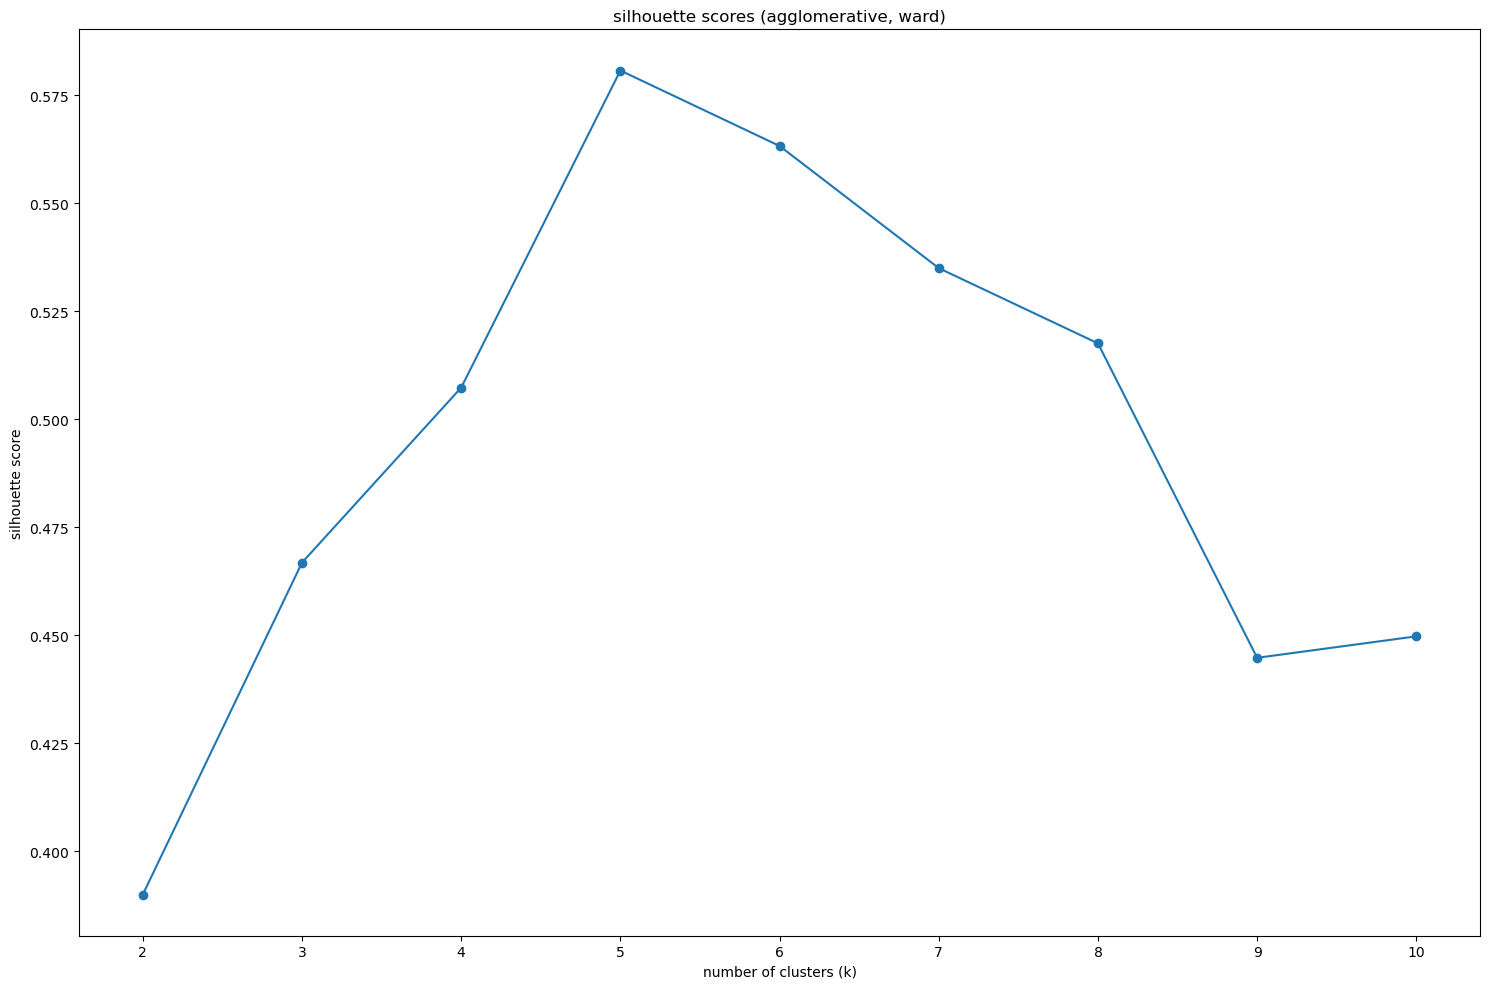

k=2: silhouette=0.390
k=3: silhouette=0.467
k=4: silhouette=0.507
k=5: silhouette=0.581
k=6: silhouette=0.563
k=7: silhouette=0.535
k=8: silhouette=0.518
k=9: silhouette=0.445
k=10: silhouette=0.450


In [67]:
# silhouette scan for ward to choose k (keep it focused on ward)
ks = range(2, 11)
sil_scores = []

for k in ks:
    ag = AgglomerativeClustering(n_clusters=k, linkage='ward', metric='euclidean')
    labels = ag.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

plt.plot(list(ks), sil_scores, marker='o')
plt.title("silhouette scores (agglomerative, ward)")
plt.xlabel("number of clusters (k)")
plt.ylabel("silhouette score")
plt.tight_layout()
plt.show()

for k, s in zip(ks, sil_scores):
    print(f"k={k}: silhouette={s:.3f}")

**silhouette analysis for ward**

i tested k values between 2–10 clusters using ward linkage.  
- silhouette score peaks at **k=5 (0.581)**.  
- k=6 also performs well but drops slightly.  
- values beyond 6 decline further.  

decision: select **k=5** clusters for consistency with k-means and based on best silhouette score.

In [68]:
# fit final agglomerative model with chosen k (use 5 to compare with the k-means)
k_h = 5
ag_final = AgglomerativeClustering(n_clusters=k_h, linkage='ward', metric='euclidean')
labels_h = ag_final.fit_predict(X_scaled)

# attach labels for plotting and summary
df3_h = df3.copy()
df3_h['cluster_h'] = labels_h

# sizes and simple summary
sizes_h = df3_h['cluster_h'].value_counts().sort_index()
print("cluster sizes (hierarchical):")
print(sizes_h)
print("\ncluster size proportions:")
print((sizes_h / sizes_h.sum()).round(3))

cluster sizes (hierarchical):
cluster_h
0    308
1    280
2    356
3    259
4    797
Name: count, dtype: int64

cluster size proportions:
cluster_h
0    0.154
1    0.140
2    0.178
3    0.130
4    0.398
Name: count, dtype: float64


**Cluster sizes and proportions**

The hierarchical model with k=5 produced unbalanced clusters:  
- cluster 4 = 39.8% of data (largest group).  
- clusters 0, 1, 2, 3 are smaller (13–18% each).  

This imbalance makes sense in real customer data, where one group often dominates.  

count    2000.000000
mean     1578.032000
std      1283.239705
min        25.000000
25%       772.000000
50%      1276.000000
75%      1751.250000
max      6847.000000
Name: loyalty_points, dtype: float64
Skewness: 1.4647925003740154
Kurtosis: 1.7161153076553912


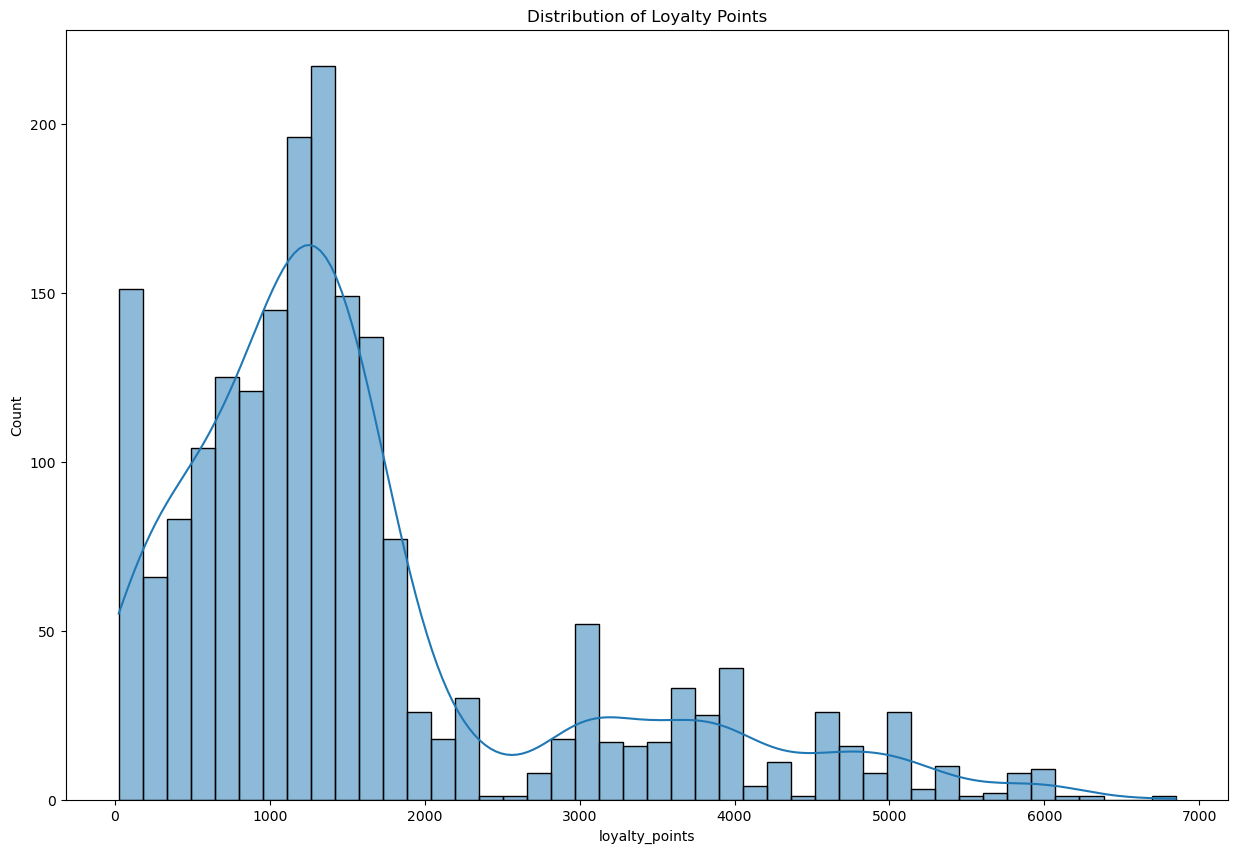

In [69]:
# Exploring distribution of loyalty points via a histogram
print(reviews['loyalty_points'].describe())
print("Skewness:", reviews['loyalty_points'].skew())
print("Kurtosis:", reviews['loyalty_points'].kurt())
sns.histplot(reviews['loyalty_points'], kde=True)
plt.title("Distribution of Loyalty Points")
plt.show()

The curve confirms a long right tail (a small group of customers accumulate very high loyalty points).

Most customers sit between ~500–2500 loyalty points.

While not perfectly normally distributed, this level of skewness is acceptable for regression, particularly with large sample sizes (n=2000). However, the skew suggests that predictions may slightly overestimate lower values and underestimate extreme high values. Overall, the data is suitable for building predictive models, but a transformation (e.g. log) could be considered if higher accuracy on extreme values is required.

# NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked us to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## 1. Load and explore the data

In [70]:
# Import all the necessary packages
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt')
# nltk.download ('stopwords')

!pip install wordcloud textblob nltk
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [71]:
# Load the cleaned dataset
df = pd.read_csv("turtle_reviews_clean.csv")

# Keep only review and summary columns
df_text = df[['review', 'summary']]

# Quick sense-check
print("Shape:", df_text.shape)
print("Columns:", df_text.columns)
print(df_text.head())
print(df_text.info())

# Check for missing values
print("\nMissing values per column:\n", df_text.isnull().sum())

Shape: (2000, 2)
Columns: Index(['review', 'summary'], dtype='object')
                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: 

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [72]:
# Lowercase + normalise spaces (for both columns)

df_text['review']  = (df_text['review']
                      .str.lower()
                      .str.replace(r'\s+', ' ', regex=True)
                      .str.strip())

df_text['summary'] = (df_text['summary']
                      .str.lower()
                      .str.replace(r'\s+', ' ', regex=True)
                      .str.strip())

# view output
df_text.head()

review  \
0  when it comes to a dm's screen, the space on t...   
1  an open letter to galeforce9*: your unpainted ...   
2  nice art, nice printing. why two panels are fi...   
3  amazing buy! bought it as a gift for our new d...   
4  as my review of gf9's previous screens these w...   

                                             summary  
0  the fact that 50% of this space is wasted on a...  
1  another worthless dungeon master's screen from...  
2                    pretty, but also pretty useless  
3                                         five stars  
4                                         money trap

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [73]:
# Replace all the punctuations in review column
punct_pattern = r"[^\w\s']"   # anything not word/space/apostrophe

# review
df_text['review'] = (df_text['review']
                     .str.replace(punct_pattern, ' ', regex=True)
                     .str.replace(r'\s+', ' ', regex=True)
                     .str.strip())
df_text[['review']].head()

review
0  when it comes to a dm's screen the space on th...
1  an open letter to galeforce9 your unpainted mi...
2  nice art nice printing why two panels are fill...
3  amazing buy bought it as a gift for our new dm...
4  as my review of gf9's previous screens these w...

In [74]:
# Replace all the punctuations in summary column
df_text['summary'] = (df_text['summary']
                      .str.replace(punct_pattern, ' ', regex=True)
                      .str.replace(r'\s+', ' ', regex=True)
                      .str.strip())
df_text[['summary']].head()


summary
0  the fact that 50 of this space is wasted on ar...
1  another worthless dungeon master's screen from...
2                     pretty but also pretty useless
3                                         five stars
4                                         money trap

### 2c) Drop duplicates in both columns

In [75]:
# 2c) Check for row duplicates (review + summary together)

# count full row duplicates
full_dupes = df_text.duplicated().sum()
print("Number of full row duplicates (review + summary):", full_dupes)

# show a few examples if they exist
if full_dupes > 0:
    print("\nExamples of full row duplicates:")
    display(df_text[df_text.duplicated()].head())

Number of full row duplicates (review + summary): 39

Examples of full row duplicates:


review     summary
94     great  five stars
326  love it  five stars
371    great  five stars
404     good  five stars
408    great  five stars

In [76]:
# Determine if there are any duplicates in d
print("Number of duplicate rows in df_text:",df_text.duplicated().sum())

Number of duplicate rows in df_text: 39


A total of **39 full row duplicates** (same review + same summary) were detected.  
Although these could be removed, I chose to **retain them** because:  

- Duplicate short reviews such as *"five stars"* or *"great"* may represent genuine feedback from different customers.  
- In NLP, repetition is meaningful since it reflects the **frequency and popularity of expressions** in customer sentiment.  
- Removing them would artificially reduce the prevalence of common reviews and bias the analysis.  

Therefore, duplicates were **kept intentionally** to preserve the natural distribution of customer sentiment.  

## 3. Tokenise and create wordclouds

In [77]:
# Create new DataFrame (copy DataFrame)
df_tokens = df_text.copy()
print("Shape of copy:", df_tokens.shape)
df_tokens.head()

Shape of copy: (2000, 2)


review  \
0  when it comes to a dm's screen the space on th...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9's previous screens these w...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon master's screen from...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap

In [78]:
# Apply tokenisation to both columns
from nltk.tokenize import word_tokenize

# tokenise each review and summary
df_tokens['review_tokens'] = df_tokens['review'].apply(word_tokenize)
df_tokens['summary_tokens'] = df_tokens['summary'].apply(word_tokenize)

# View output
df_tokens[['review_tokens', 'summary_tokens']].head()

review_tokens  \
0  [when, it, comes, to, a, dm, 's, screen, the, ...   
1  [an, open, letter, to, galeforce9, your, unpai...   
2  [nice, art, nice, printing, why, two, panels, ...   
3  [amazing, buy, bought, it, as, a, gift, for, o...   
4  [as, my, review, of, gf9, 's, previous, screen...   

                                      summary_tokens  
0  [the, fact, that, 50, of, this, space, is, was...  
1  [another, worthless, dungeon, master, 's, scre...  
2               [pretty, but, also, pretty, useless]  
3                                      [five, stars]  
4                                      [money, trap]

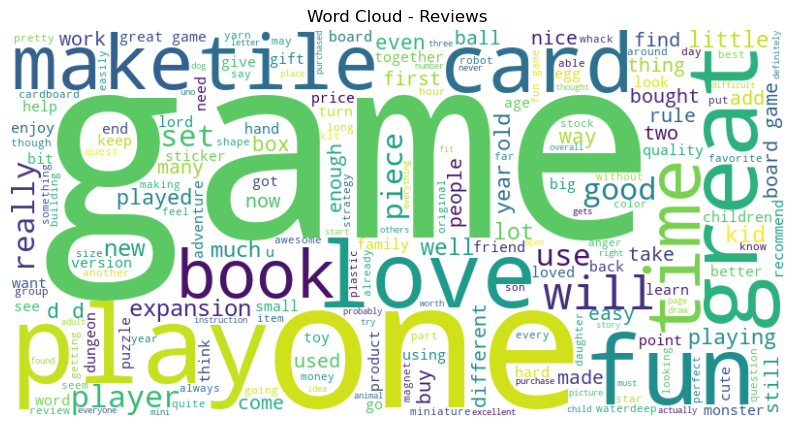

In [79]:
# Review: Create and plot a WordCloud
review_text = " ".join(df_tokens['review'])
review_wc = WordCloud(width=800, height=400, background_color="white").generate(review_text)

plt.figure(figsize=(10,6))
plt.imshow(review_wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Reviews")
plt.show()

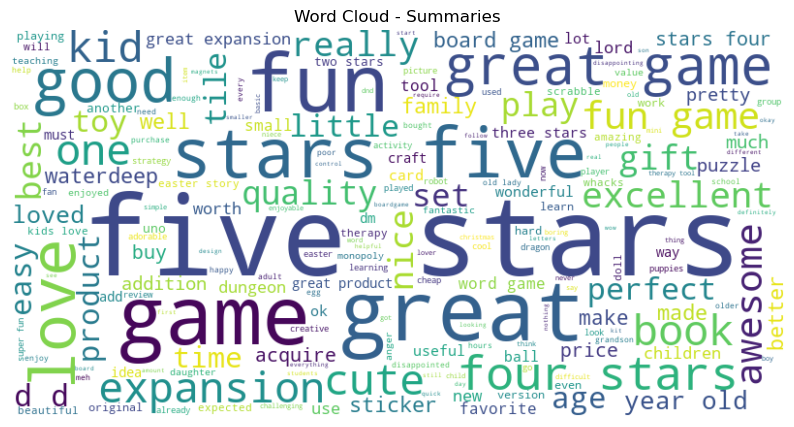

In [80]:
# Summary: Create and plot a WordCloud
summary_text = " ".join(df_tokens['summary'])
summary_wc = WordCloud(width=800, height=400, background_color="white").generate(summary_text)

plt.figure(figsize=(10,6))
plt.imshow(summary_wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Summaries")
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [81]:
# Determine the frequency distribution
from nltk.probability import FreqDist

# flatten token lists
rev_tokens_all = [w for toks in df_tokens['review_tokens'] for w in toks]
sum_tokens_all = [w for toks in df_tokens['summary_tokens'] for w in toks]

fd_rev_raw = FreqDist(rev_tokens_all)
fd_sum_raw = FreqDist(sum_tokens_all)

print("reviews (raw) — top 10:", fd_rev_raw.most_common(10))
print("summaries (raw) — top 10:", fd_sum_raw.most_common(10))

reviews (raw) — top 10: [('the', 5464), ('and', 3253), ('a', 3191), ('to', 3171), ('of', 2499), ('it', 2496), ('i', 2356), ('is', 1835), ('this', 1781), ('game', 1713)]
summaries (raw) — top 10: [('stars', 466), ('five', 381), ('game', 319), ('great', 295), ('the', 262), ('a', 242), ('for', 232), ('fun', 218), ('to', 193), ('it', 185)]


### 4b) Remove alphanumeric characters and stopwords

In [82]:
# remove alphanumeric tokens and stopwords (fix contractions)
import re
from nltk.corpus import stopwords

# base stopwords + add common contraction fragments (both ' and ’ forms)
stop_words = set(stopwords.words('english'))
stop_words |= {"'s", "’s", "n't", "n’t", "'re", "’re", "'ll", "’ll", "'ve", "’ve", "'d", "’d", "'m", "’m"}

# only letters (no apostrophes now)
alpha_only = re.compile(r"^[a-z]+$")

# lowercase, keep purely alphabetic tokens, drop stopwords
rev_clean = [w.lower() for w in rev_tokens_all if alpha_only.match(w.lower()) and w.lower() not in stop_words]
sum_clean = [w.lower() for w in sum_tokens_all if alpha_only.match(w.lower()) and w.lower() not in stop_words]

# rebuild frequency distributions
from nltk.probability import FreqDist
fd_rev = FreqDist(rev_clean)
fd_sum = FreqDist(sum_clean)

print("reviews (clean) — top 10:", fd_rev.most_common(10))
print("summaries (clean) — top 10:", fd_sum.most_common(10))

reviews (clean) — top 10: [('game', 1713), ('great', 598), ('fun', 558), ('one', 540), ('play', 507), ('like', 421), ('love', 332), ('get', 320), ('really', 319), ('cards', 306)]
summaries (clean) — top 10: [('stars', 466), ('five', 381), ('game', 319), ('great', 295), ('fun', 218), ('love', 93), ('good', 93), ('four', 58), ('like', 54), ('expansion', 53)]


### 4c) Create wordcloud without stopwords

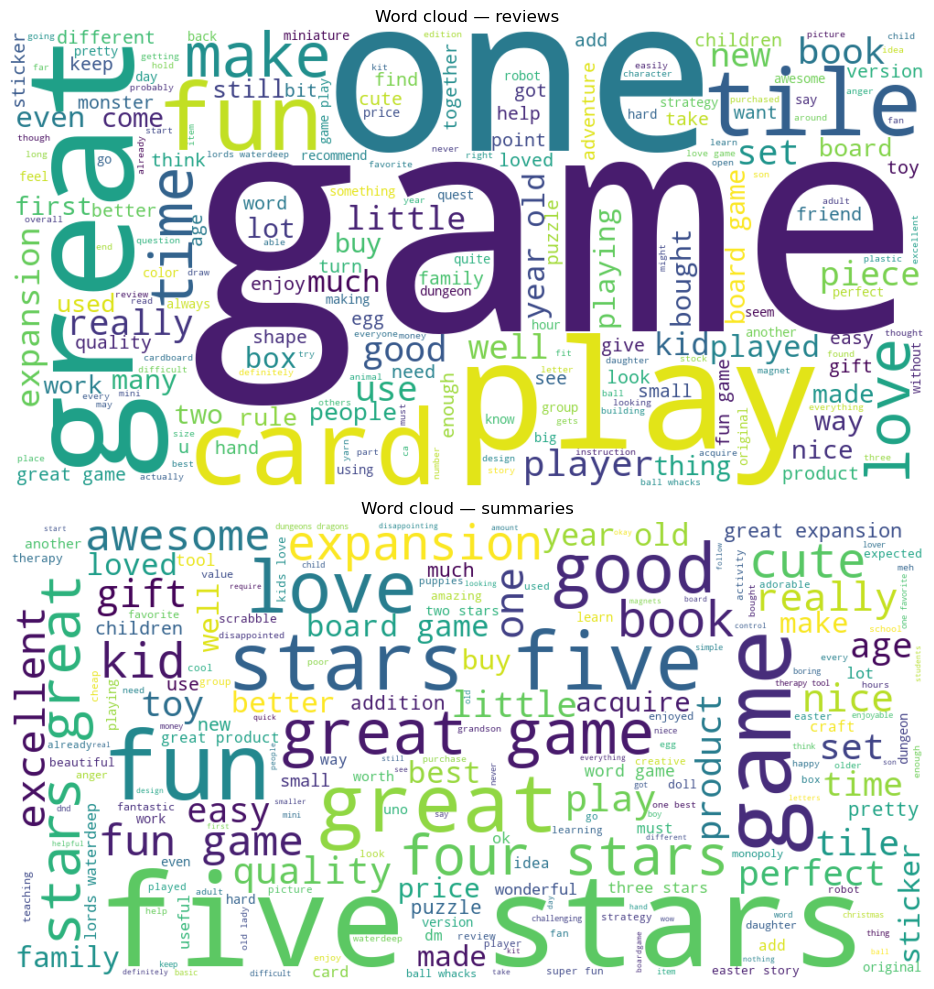

In [83]:
# Create a wordcloud without stop words
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10)) 

# First wordcloud
plt.subplot(2,1,1)  
plt.imshow(WordCloud(width=1000, height=500, background_color="white")
           .generate(" ".join(rev_clean)), interpolation="bilinear")
plt.axis('off')
plt.title("Word cloud — reviews")

# Second wordcloud
plt.subplot(2,1,2)  # 2 rows, 1 column, second plot
plt.imshow(WordCloud(width=1000, height=500, background_color="white")
           .generate(" ".join(sum_clean)), interpolation="bilinear")
plt.axis('off')
plt.title("Word cloud — summaries")

plt.tight_layout()
plt.show()

### 4d) Identify 15 most common words and polarity

In [84]:
# top 15 words + sentiment polarity
from textblob import TextBlob
import pandas as pd

def top_words_with_polarity(fd, k=15):
    words, counts = zip(*fd.most_common(k)) if len(fd) else ([], [])
    pol = [TextBlob(w).sentiment.polarity for w in words]
    return pd.DataFrame({"word": words, "count": counts, "polarity": pol})

top15_reviews   = top_words_with_polarity(fd_rev, 15)
top15_summaries = top_words_with_polarity(fd_sum, 15)

print("Top 15 — reviews");   display(top15_reviews)
print("Top 15 — summaries"); display(top15_summaries)

Top 15 — reviews


word  count  polarity
0     game   1713      -0.4
1    great    598       0.8
2      fun    558       0.3
3      one    540       0.0
4     play    507       0.0
5     like    421       0.0
6     love    332       0.5
7      get    320       0.0
8   really    319       0.2
9    cards    306       0.0
10   would    301       0.0
11   tiles    300       0.0
12    time    298       0.0
13    good    296       0.7
14    book    278       0.0

Top 15 — summaries


word  count  polarity
0       stars    466       0.0
1        five    381       0.0
2        game    319      -0.4
3       great    295       0.8
4         fun    218       0.3
5        love     93       0.5
6        good     93       0.7
7        four     58       0.0
8        like     54       0.0
9   expansion     53       0.0
10       kids     51       0.0
11       cute     45       0.5
12       book     43       0.0
13        one     39       0.0
14        old     37       0.1

easier to view in chart

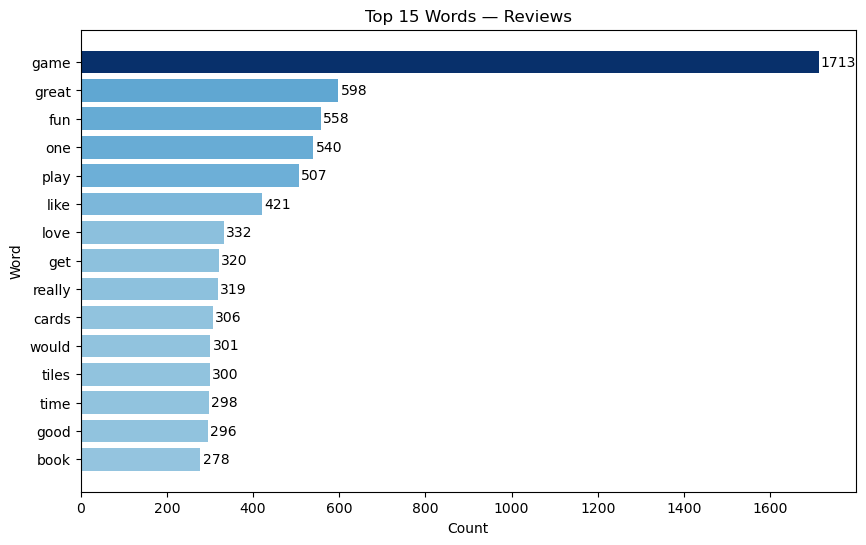

In [85]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np

# Plot Top 15 words in Reviews
plt.figure(figsize=(10,6))
top15_reviews = fd_rev.most_common(15)
words, counts = zip(*top15_reviews)

# Normalize counts to [0,1]
norm_counts = (np.array(counts) - min(counts)) / (max(counts) - min(counts))

# Use only the darkest 50% of the "Blues" colormap
blues = cm.get_cmap("Blues", 256)
dark_blues = mcolors.LinearSegmentedColormap.from_list(
    "dark_blues", blues(np.linspace(0.4, 1, 256))
)

colors = dark_blues(norm_counts)

plt.barh(words, counts, color=colors)
for i, c in enumerate(counts):
    plt.text(c+5, i, str(c), va="center", color="black", fontsize=10)

plt.gca().invert_yaxis()
plt.title("Top 15 Words — Reviews")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()


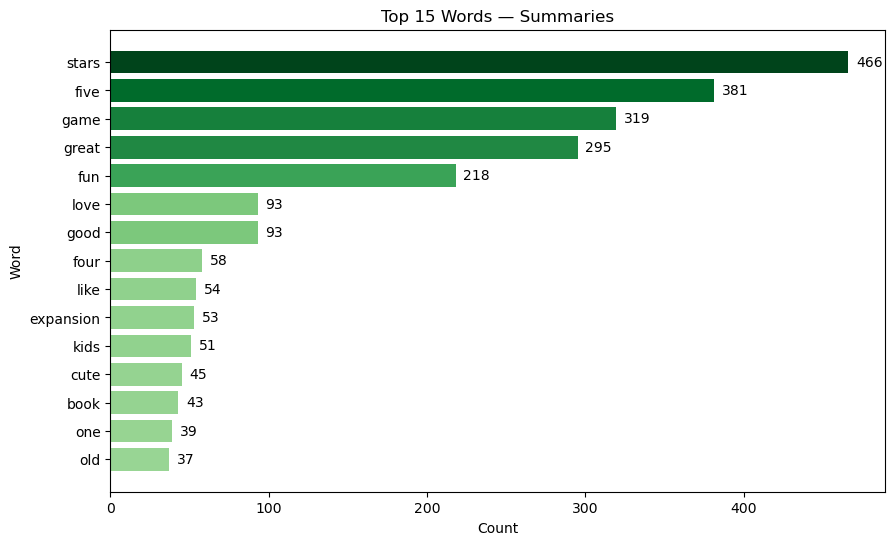

In [86]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np

# Plot Top 15 words in Summaries
plt.figure(figsize=(10,6))
top15_summaries = fd_sum.most_common(15)
words, counts = zip(*top15_summaries)

# Normalize counts to [0,1]
norm_counts = (np.array(counts) - min(counts)) / (max(counts) - min(counts))

# Use only the darkest 50% of the "Greens" colormap
greens = cm.get_cmap("Greens", 256)
dark_greens = mcolors.LinearSegmentedColormap.from_list(
    "dark_greens", greens(np.linspace(0.4, 1, 256))
)

colors = dark_greens(norm_counts)

plt.barh(words, counts, color=colors)
for i, c in enumerate(counts):
    plt.text(c+5, i, str(c), va="center", color="black", fontsize=10)

plt.gca().invert_yaxis()
plt.title("Top 15 Words — Summaries")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

### Polarity scores using TextBlob

**Comment on "five stars"**
While TextBlob is useful for a quick polarity analysis, it relies on a built-in dictionary (lexicon).  
This means certain phrases that humans clearly interpret as positive or negative may be scored incorrectly.  
For example, the comment "Five Stars" receives a polarity of **0.0 (neutral)**, even though it should logically be very positive.  

This highlights a limitation of dictionary-based sentiment analysis and suggests that custom lexicons  
or machine learning–based sentiment tools (e.g., VADER) may give more accurate results.

In [87]:
# Provided function
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [88]:
# Apply polarity function to reviews and summaries
df_sent = df_text.copy()
df_sent['review_polarity']  = df_sent['review'].apply(generate_polarity)
df_sent['summary_polarity'] = df_sent['summary'].apply(generate_polarity)

# View summary stats
df_sent[['review_polarity','summary_polarity']].describe().round(3)

review_polarity  summary_polarity
count         2000.000          2000.000
mean             0.217             0.220
std              0.262             0.336
min             -1.000            -1.000
25%              0.048             0.000
50%              0.180             0.071
75%              0.358             0.451
max              1.000             1.000

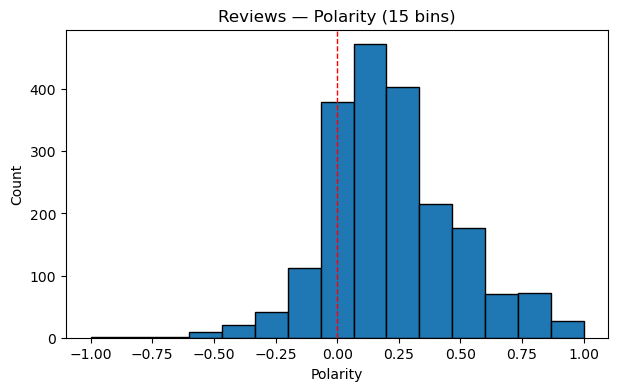

In [89]:
# Review: Create a histogram plot with bins = 15
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.hist(df_sent['review_polarity'], bins=15, edgecolor='black')
plt.axvline(0, color='red', linestyle='--', linewidth=1)
plt.title("Reviews — Polarity (15 bins)")
plt.xlabel("Polarity"); plt.ylabel("Count")
plt.show()

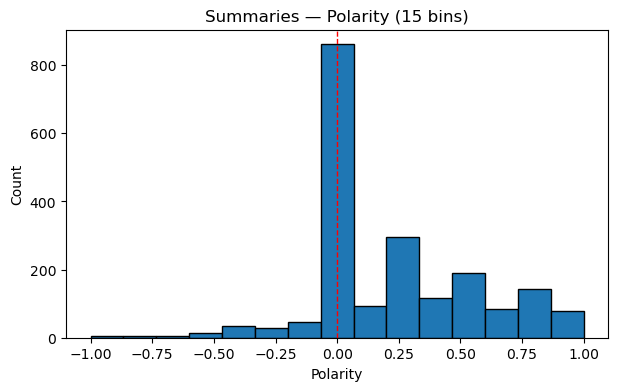

In [90]:
# Summary: Create a histogram plot with bins = 15
plt.figure(figsize=(7,4))
plt.hist(df_sent['summary_polarity'], bins=15, edgecolor='black')
plt.axvline(0, color='red', linestyle='--', linewidth=1)
plt.title("Summaries — Polarity (15 bins)")
plt.xlabel("Polarity"); plt.ylabel("Count")
plt.show()

**Interpretation**

Reviews:
- Mean polarity = 0.217 → On average, reviews lean slightly positive.
- Median (50%) = 0.18 → half of reviews are above weakly positive.
- Range = -1 to 1 → reviews include strongly negative and strongly positive.

Summaries:
- Mean polarity = 0.220, similar to reviews → short summaries also lean slightly positive.
- Median = 0.071 → most summaries are much closer to neutral than reviews.
- Big cluster at 0.0 (seen in the histogram). That’s why the median is so low.

Reviews histogram:
- Distribution is spread out, peaking around 0.1–0.2 (slightly positive).
- A healthy mix of negative and positive reviews — but still skewed positive overall.

Summaries histogram:
- Strong spike at 0 (neutral polarity).
- Much narrower distribution compared to reviews.

### Subjectivity scores using TextBlob

In [91]:
# Determine subjectivity of both columns
# Subjectivity ranges from 0 (very objective/factual) to 1 (very subjective/opinion-based)

def generate_subjectivity(comment):
    """Return subjectivity score (0 = objective, 1 = subjective)."""
    return TextBlob(str(comment)).sentiment.subjectivity

# Apply subjectivity function to reviews and summaries
df_sent['review_subjectivity']  = df_sent['review'].apply(generate_subjectivity)
df_sent['summary_subjectivity'] = df_sent['summary'].apply(generate_subjectivity)

# Quick descriptive statistics for subjectivity
df_sent[['review_subjectivity','summary_subjectivity']].describe().round(3)

review_subjectivity  summary_subjectivity
count             2000.000              2000.000
mean                 0.518                 0.379
std                  0.192                 0.341
min                  0.000                 0.000
25%                  0.424                 0.000
50%                  0.511                 0.400
75%                  0.604                 0.633
max                  1.000                 1.000

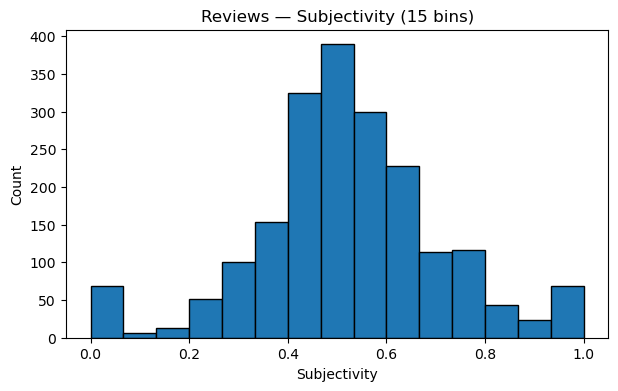

In [92]:
# Histogram of review subjectivity
# Shows how subjective (opinion-based) the reviews are
plt.figure(figsize=(7,4))
plt.hist(df_sent['review_subjectivity'], bins=15, edgecolor='black')
plt.title("Reviews — Subjectivity (15 bins)")
plt.xlabel("Subjectivity")
plt.ylabel("Count")
plt.show()

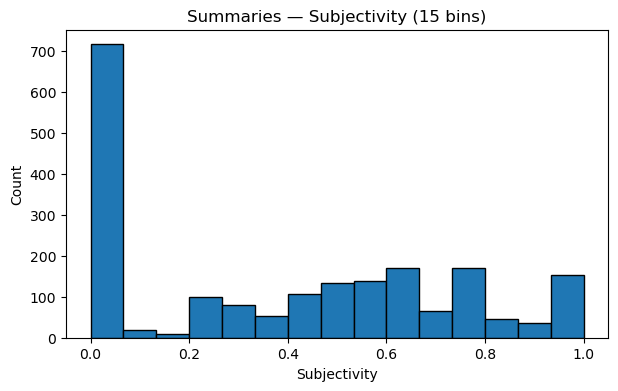

In [93]:
# Histogram of summary subjectivity
plt.figure(figsize=(7,4))
plt.hist(df_sent['summary_subjectivity'], bins=15, edgecolor='black')
plt.title("Summaries — Subjectivity (15 bins)")
plt.xlabel("Subjectivity")
plt.ylabel("Count")
plt.show()

**Interpretation**

Reviews
- Mean subjectivity = 0.518 → reviews are generally moderately subjective.
- Distribution is fairly tight (std = 0.192), with most reviews around 0.4–0.6.
- Median ≈ 0.51 → about half of reviews are written in a subjective tone.

Summaries
- Mean subjectivity = 0.379, notably lower than reviews.
- Much wider spread (std = 0.341).
- Median ≈ 0.40, but with a huge cluster at 0.0 (neutral/objective).

Reviews Histogram:
- Bell-shaped distribution around 0.5.
- Suggests that most reviews are opinion-based, but still grounded in factual detail.

Summaries Histogram:
- Very large spike at 0 (objective).
- Indicates many summaries are just labels or short factual statements (e.g. “Five stars,” “Good,” “Small book”), which TextBlob treats as neutral/objective.
- When summaries are longer, they spread across the full range up to 1.0, showing subjectivity when opinions appear.

### Sentiment analysis using Vader

In [94]:
# Import VADER sentiment 
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Initialise analyser
sia = SentimentIntensityAnalyzer()

# Apply VADER to reviews
df_sent['review_vader_compound'] = df_sent['review'].apply(lambda x: sia.polarity_scores(str(x))['compound'])
df_sent['review_vader_neg']      = df_sent['review'].apply(lambda x: sia.polarity_scores(str(x))['neg'])
df_sent['review_vader_neu']      = df_sent['review'].apply(lambda x: sia.polarity_scores(str(x))['neu'])
df_sent['review_vader_pos']      = df_sent['review'].apply(lambda x: sia.polarity_scores(str(x))['pos'])

# Apply VADER to summaries
df_sent['summary_vader_compound'] = df_sent['summary'].apply(lambda x: sia.polarity_scores(str(x))['compound'])
df_sent['summary_vader_neg']      = df_sent['summary'].apply(lambda x: sia.polarity_scores(str(x))['neg'])
df_sent['summary_vader_neu']      = df_sent['summary'].apply(lambda x: sia.polarity_scores(str(x))['neu'])
df_sent['summary_vader_pos']      = df_sent['summary'].apply(lambda x: sia.polarity_scores(str(x))['pos'])

# Quick check
df_sent[['review','review_vader_compound','summary','summary_vader_compound']].head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/eloisefarmer/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


review  review_vader_compound  \
0  when it comes to a dm's screen the space on th...                -0.6333   
1  an open letter to galeforce9 your unpainted mi...                 0.9171   
2  nice art nice printing why two panels are fill...                -0.0045   
3  amazing buy bought it as a gift for our new dm...                 0.8860   
4  as my review of gf9's previous screens these w...                -0.6808   

                                             summary  summary_vader_compound  
0  the fact that 50 of this space is wasted on ar...                 -0.0711  
1  another worthless dungeon master's screen from...                 -0.4404  
2                     pretty but also pretty useless                  0.4019  
3                                         five stars                  0.0000  
4                                         money trap                 -0.3182

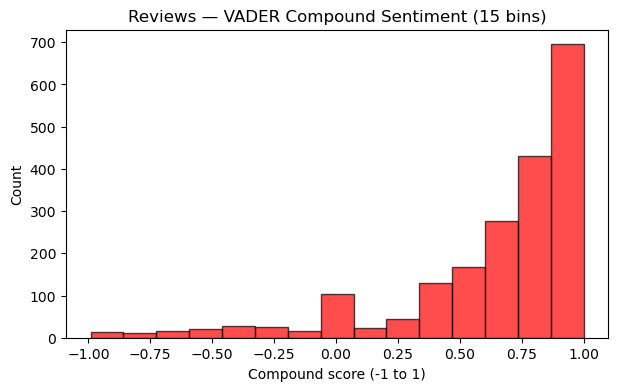

In [95]:
# Histogram: Reviews (VADER compound)
plt.figure(figsize=(7,4))
plt.hist(df_sent['review_vader_compound'], bins=15, edgecolor='black', alpha=0.7, color='red')
plt.title("Reviews — VADER Compound Sentiment (15 bins)")
plt.xlabel("Compound score (-1 to 1)")
plt.ylabel("Count")
plt.show()

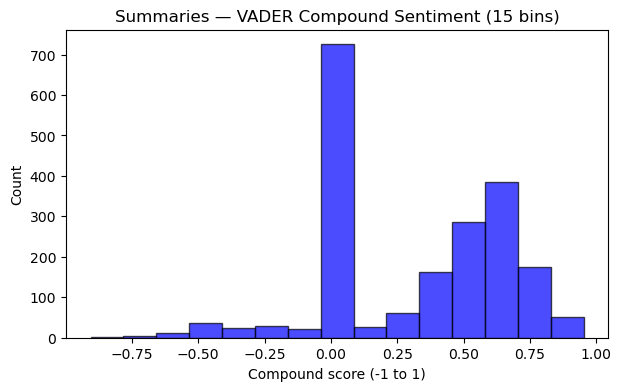

In [96]:
# Histogram: Summaries (VADER compound)
plt.figure(figsize=(7,4))
plt.hist(df_sent['summary_vader_compound'], bins=15, edgecolor='black', alpha=0.7, color='blue')
plt.title("Summaries — VADER Compound Sentiment (15 bins)")
plt.xlabel("Compound score (-1 to 1)")
plt.ylabel("Count")
plt.show()

**Interpretation**

Reviews (VADER compound):
- Distribution is heavily skewed toward positive scores (0.5–1.0).
- Strong clustering near +1.0, suggesting most reviews are interpreted as very positive.
- Example: "amazing buy" → 0.8860, "open letter … unpainted" → 0.9171 (correctly positive).
- However, "when it comes to a DM's screen … wasted" scored -0.6333, showing that VADER can still pick up strong negatives.

Summaries (VADER compound):
- More varied, but still skewed positive.
- Large spike at 0.0 (neutral), just like with TextBlob.
- Positive words like "five stars" are sometimes scored neutral (0.0) — showing a limitation.
- Negative terms like "money trap" scored -0.3182, which matches human intuition.

The VADER sentiment analysis results indicate that reviews are overwhelmingly 
interpreted as positive, with most compound scores clustering between 0.5 and 1.0. 
This aligns with the expectation that satisfied customers are more likely to leave 
detailed reviews.

Summaries show greater variability but also a large spike at 0 (neutral). 
This reflects a limitation of VADER when handling very short text such as "five stars," 
which a human reader would interpret as strongly positive. Nevertheless, VADER performs 
well in capturing clear negatives (e.g. "money trap") and positives (e.g. "amazing buy").

Compared to TextBlob, VADER tends to produce stronger positive scores and captures 
the sentiment of informal language more effectively. However, both methods struggle 
with short summaries, underscoring the need for caution when interpreting results.

### Summary records with a sentiment of 0

In [97]:
# Create a subset DataFrame with summaries where VADER compound score = 0
df_summ_neutral = df_sent.loc[df_sent['summary_vader_compound'] == 0]
print("Number of summaries with compound score = 0:", len(df_summ_neutral))

# Look at unique values
df_summ_neutral['summary'].unique()[:30]  # show first 30 unique summaries

Number of summaries with compound score = 0: 712


array(['five stars', 'not a general dm screen', 'fell completely flat',
       'buckley was a card mommer', 'not enough product', 'four stars',
       'three stars', 'tiny book', 'just sticker at a premium', 'tiny',
       'worked for a trip only a few pages',
       'should be a buck at dollar store', 'small book', 'robot',
       'one star', "won't keep them occupied for long",
       'smaller than thought', 'size is off',
       'this is a little sticker book for a little kid',
       'hours of entertaintment', 'robot time', 'stickers',
       'smallest activity book ever', 'small sized', 'not as advertised',
       'smaller than life', 'junk', 'eh',
       'my five year old grandson my wife and', 'two stars'], dtype=object)

In [98]:
# Compare to TextBlob polarity = 0
df_summ_neutral_tb = df_sent.loc[df_sent['summary_polarity'] == 0]
print("Number of summaries with TextBlob polarity = 0:", len(df_summ_neutral_tb))
df_summ_neutral_tb['summary'].unique()[:30]

Number of summaries with TextBlob polarity = 0: 745


array(['pretty but also pretty useless', 'five stars', 'money trap',
       'another missed opportunity not a value add to the product line',
       'buckley was a card mommer', "don't bother", 'not enough product',
       'well done', 'my relaxation', 'stained glass perfection',
       'four stars', 'three stars',
       'i like every image contained in this stained glass coloring book',
       'tiny book', 'save your money', 'just sticker at a premium',
       'tiny', 'should be a buck at dollar store', 'robot', 'one star',
       'smaller than thought', 'size is off', 'hours of entertaintment',
       'robot time', 'stickers', 'smallest activity book ever',
       'not as advertised', 'smaller than life', 'robot lover',
       "doesn't hold up well"], dtype=object)

**Findings**

When filtering for summaries where the **VADER compound sentiment score = 0**, we found 712 examples.  
Many of these cases highlight the limitations of sentiment analysis. For instance:  

- Positive-sounding phrases such as **"five stars"** were scored as neutral.  
- Negative phrases like **"buyer beware"** or **"not as advertised"** were also scored as neutral.  

This demonstrates that while VADER is often more effective than TextBlob (especially for short phrases), it can still miss context and nuance. A human reader would likely interpret these examples as strongly positive or negative.  

Such findings reinforce the importance of using sentiment analysis as a **supporting tool** rather than a replacement for human judgement in text interpretation.

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [99]:
# Top 20 most negative reviews (lowest VADER compound)
import pandas as pd
pd.set_option("display.max_colwidth", None)   # show full text in a column
top20_neg_reviews = df_sent.sort_values(by='review_vader_compound').head(20)
top20_neg_reviews[['review', 'review_vader_compound']]

review  \
1119  here is my review cross posted from boardgamegeek com i have fond memories of d d from my youth that i occasionally attempt to recapture i remember the sense of vague foreboding conjured by rpg like board games such as runequest and spacehulk i had read some favorable reviews of the new rpg as boardgame series promoted by wizards on the coast and i was excited to try this i splunked down my hard earned cash and amazon duly delivered a hefty box of dreams to my doorstep wrath of ashardalon and i had some good times initially my friends and i gamely punched all the cardboard pieces out of the sprues we love punching pieces out of sprues it inspires a sense of childlike wonder and anticipation in us this tile has a horrid chamber on it that dungeon tile has dead bodies ooh i wonder what a flaming sphere does these cards all have various powers and spells on them look you can play a dragon character and the plastic figurines were enjoyable similar to those plastic dinosaurs we all had as kids whee sadly that was the best part of the game everything went downhill when we actually started to play the game itself is a reductionist vision of a dungeon crawl it is unfortunately so reductionist that is effectively a game of munchkin but without a sense of humor i think the game designers must have sensed this and to try to add a sense of danger and urgency to the game they created a deck of sadistic encounter cards to punish us for playing but more about those later the players progress through the dungeon together at every unexplored edge they kick down the door and grow the dungeon by one 1 new dungeon tile guaranteed to contain exactly one 1 new monster and possible an encounter card which is invariably unpleasant this game might have been interesting if every new corner of the dungeon had produced a novel challenge for the players to make strategic decisions about together instead the players typically have one power which is the min max best option for any given monster and they use it over and over again the twenty sided die is rolled the monster advances it does a hit point of damage to the wizard and then it dies and drops a treasure it's difficult to be heroic in this game the characters are punished for pushing forward into the darkness they are also punished for standing still they are punished for gathering together on one tile and they are punished for spreading out there are precious few strategic decisions to be made in this game all of this is incredibly tedious and dull i magic missile the darkness the power cards feel poorly thought out poorly worded and disappointing the hypnosis card seems promising it can cause one monster to attack another my goodness a card that allows the players to turn the dungeon against itself strategy but no unlike the scroll of monster control item which replaces a monster's attack on the players hypnosis simply supplements the monster's action with it's hypnotized attack but can the power at least let the players turn the cave bear's awesome claws attack against the kobold horde no not really the monster's attack is reduced to a standardized attack 9 damage 1 as printed on the card really this card is a 9 1 damage attack that only works if two monsters are in the same room is this what the game designers intended who knows but hey that's what it says on the card if the player's powers are boring at least the game designers also gave us encounter cards we scrubbed through the rules multiple times certain we were misinterpreting them but no every player will typically draw at least one encounter card every turn thus a four player band of characters fighting a monster will typically draw four encounter cards every round of combat sadly the encounter cards aren't terribly creative they all seem to be variants of random thing happens and everybody takes a point of damage your band of fearless heroes has just spent a turn vanquishing a kobold and you're feeling pretty good about 

In [100]:
# Top 20 most negative summaries
top20_neg_summaries = df_sent.sort_values(by='summary_vader_compound').head(20)
top20_neg_summaries[['summary', 'summary_vader_compound']]

summary  \
882   a crappy cardboard ghost of the original hard to believe they did this but they did shame on hasbro disgusting   
1565                                            the tardis the doctor river song amy rory fight every enemy in cards   
947                                                                                                  no 20 sided die   
328                                                                                                defective poor qc   
1003                                                        then you will find this board game to be dumb and boring   
1166                                      before this i hated running any rpg campaign dealing with towns because it   
426                              but it gets repetitive and the students start to get bored after about half a round   
847                                                                    worst quality adult board game i've even seen   
530                                                                                               anger control game   
1476                                                        adds a needed amount of tension in a tense fantasy world   
364                                                                                               anger control game   
788                                                                      great game but lazy and boring board design   
885                                                                         too bad this is not what i was expecting   
173                                                               horrible nothing more to say would give zero stars   
890                                                                                    bad quality all made of paper   
1627                                                                                           box totally destroyed   
1530                                                                             very cute but poor quality stickers   
75                                                                                         really small disappointed   
662                                                                                             not the best quality   
504                                                                                           it's uno for the angry   

      summary_vader_compound  
882                  -0.9052  
1565                 -0.7269  
947                  -0.7269  
328                  -0.7184  
1003                 -0.6808  
1166                 -0.6369  
426                  -0.6310  
847                  -0.6249  
530                  -0.5719  
1476                 -0.5719  
364                  -0.5719  
788                  -0.5647  
885                  -0.5423  
173                  -0.5423  
890                  -0.5423  
1627                 -0.5413  
1530                 -0.5266  
75                   -0.5233  
662                  -0.5216  
504                  -0.5106

The negative comments are likely most useful to Turtle Games as provides an indication on what to prioritise
Mention of quality is common in these lists, however with quality reported as a negative attribute = poor quality

In [101]:
# Top 20 most positive reviews (highest VADER compound)
top20_pos_reviews = df_sent.sort_values(by='review_vader_compound', ascending=False).head(20)
top20_pos_reviews[['review', 'review_vader_compound']]

review  \
1121                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       disclaimer bought this from a local store paid list value but supporting local game stores helps keep them in business and it's a rough market to keep a gaming store running also i do not own nor have i played nbsp a data hook product link linked class a link normal href dungeons dragons castle ravenloft board game dp 0786955570 ref cm_cr_arp_d_rvw_txt ie utf8 dungeons dragons castle ravenloft board game a the first d d adventures board game regardless dungeons dragons wrath of ashardalon board game woa is a fantastic value at 65 list you get 42 plastic unpainted minis 1 scale you get a nice set of cardboard interlocking dungeon tiles and you get a fun very random board game playable either by yourself or with up to 4 friends what it is woa is in gamer terms a roguelike in tabletop form in layman's terms woa is a dungeon crawler you start at the entrance and have a specific goal rescue the villagers survive the dungeon destroy the altar slay the dragon the adventures are built randomly based on shuffling the tiles and they are played individually as you explore you can go for a massive linear dungeon based on a little luck and careful planning or you can attempt to condense yourself in a larger swarm interconnected tunnels some of the adventures feature chambers special larger rooms that are all placed at once and filled with enemies and a specific goal that the team must complete to win the adventure it's a great way to introduce someone into tabletop roleplaying gaming it's the perfect medium between a board game and an actual pen and paper rpg it's a fun quick game to run a quick adventure for some friends taking anywhere between 20 minutes and an hour per adventure what it isn't a deeper roleplaying game with a full interconnected series of quests over a grand campaign

In [102]:
# Top 20 most positive summaries
top20_pos_summaries = df_sent.sort_values(by='summary_vader_compound', ascending=False).head(20)
top20_pos_summaries[['summary', 'summary_vader_compound']]

summary  \
1201                       wow what a great set of tiles for such a great price a great starter set   
1121  wrath of ashardalon great investment for an avid rpg fan who enjoys tabletop as well as crpgs   
1699                                             great for playing great for creative workshops too   
1955                                                                easy to learn great fun to play   
1543                                         loves stickers and she loves peppa so this was perfect   
703                                              great quality very cute and perfect for my toddler   
491                                     but the kids really like it and helps start good discussion   
1189                                                   great game value for the price is great also   
1029                                                                         great game great value   
973                    i wish all those who buy better luck fairly easy to understand and plenty of   
1872          easy fun fast and thoroughly enjoyable for adults as well as kids age eight and above   
1492                             he loves construction vehicles so i am sure he will love this also   
1845                                                                    fun friendly beautiful game   
1529                                           excellent stickers my grand daughter loves peppa pig   
1425                                          a useful and fun expansion to an already awesome game   
1681                                hours of good fun here very well made and stays interesting for   
286                                                                   great birthday gift very cute   
1276                                            fantastic set great flexibility read review for tip   
1490         purchased as a gift for my great nephew who is fascinated by equipment trucks tractors   
826                                                 very fun game i would love to have the original   

      summary_vader_compound  
1201                  0.9524  
1121                  0.9186  
1699                  0.9169  
1955                  0.9136  
1543                  0.9074  
703                   0.9073  
491                   0.8988  
1189                  0.8910  
1029                  0.8910  
973                   0.8885  
1872                  0.8883  
1492                  0.8880  
1845                  0.8860  
1529                  0.8860  
1425                  0.8834  
1681                  0.8832  
286                   0.8832  
1276                  0.8779  
1490                  0.8779  
826                   0.8777

#### Convert sentiment into a business appropriate visualisation

In [103]:
# Function to classify sentiment from compound score
def sentiment_label(score):
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

# Add sentiment labels as new columns
df_sent['review_sentiment'] = df_sent['review_vader_compound'].apply(sentiment_label)
df_sent['summary_sentiment'] = df_sent['summary_vader_compound'].apply(sentiment_label)

# Quick check
print(df_sent[['review_vader_compound', 'review_sentiment']].head())
print(df_sent[['summary_vader_compound', 'summary_sentiment']].head())


   review_vader_compound review_sentiment
0                -0.6333         Negative
1                 0.9171         Positive
2                -0.0045          Neutral
3                 0.8860         Positive
4                -0.6808         Negative
   summary_vader_compound summary_sentiment
0                 -0.0711          Negative
1                 -0.4404          Negative
2                  0.4019          Positive
3                  0.0000           Neutral
4                 -0.3182          Negative


In [104]:
# Define fixed order for consistency
order = ["Positive", "Neutral", "Negative"]

# Count proportions for reviews
review_counts = (df_sent['review_sentiment']
                 .value_counts(normalize=True) * 100
                ).reindex(order, fill_value=0)

# Count proportions for summaries
summary_counts = (df_sent['summary_sentiment']
                  .value_counts(normalize=True) * 100
                 ).reindex(order, fill_value=0)

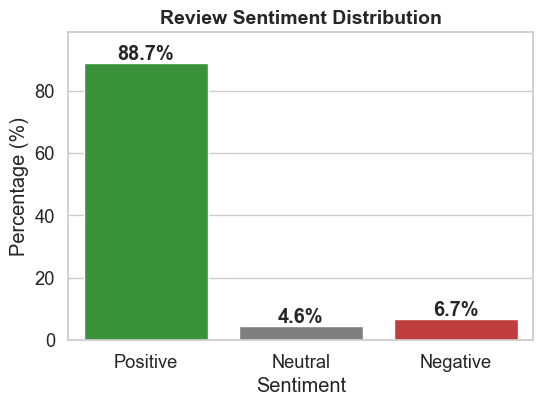

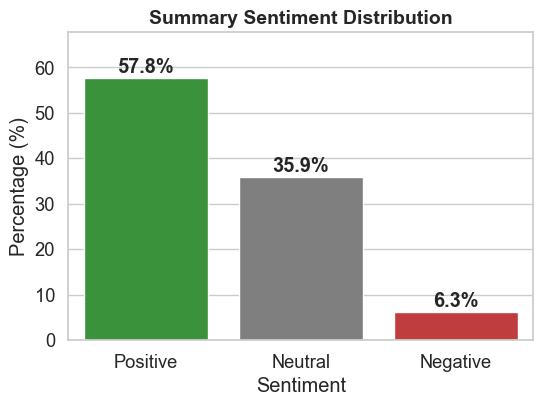

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Consistent style
sns.set_theme(style="whitegrid", font_scale=1.2)

# Define palette for sentiment (bright + readable)
sentiment_palette = {
    "Positive": "#2ca02c",   
    "Neutral": "#7f7f7f",    
    "Negative": "#d62728"    
} 

# Reviews chart 
plt.figure(figsize=(6,4))
sns.barplot(
    x=review_counts.index, 
    y=review_counts.values, 
    palette=[sentiment_palette[s] for s in review_counts.index]
)
plt.title("Review Sentiment Distribution", fontsize=14, weight="bold")
plt.ylabel("Percentage (%)")
plt.xlabel("Sentiment")
# Add labels on bars
for i, v in enumerate(review_counts.values):
    plt.text(i, v + 1, f"{v:.1f}%", ha="center", weight="bold")
plt.ylim(0, max(review_counts.values)+10)
plt.show()

# Summaries chart 
plt.figure(figsize=(6,4))
sns.barplot(
    x=summary_counts.index, 
    y=summary_counts.values, 
    palette=[sentiment_palette[s] for s in summary_counts.index]
)
plt.title("Summary Sentiment Distribution", fontsize=14, weight="bold")
plt.ylabel("Percentage (%)")
plt.xlabel("Sentiment")
# Add labels on bars
for i, v in enumerate(summary_counts.values):
    plt.text(i, v + 1, f"{v:.1f}%", ha="center", weight="bold")
plt.ylim(0, max(summary_counts.values)+10)
plt.show()

Translate into a industry understood metric: **Overall Customer Satisfaction Score (CSAT)**

In [106]:
# Number of rows (to weight properly)
n_reviews = len(df_sent['review_sentiment'])
n_summaries = len(df_sent['summary_sentiment'])

# CSAT = % of positives
csat_reviews = review_counts["Positive"]   # already % from earlier
csat_summaries = summary_counts["Positive"]

# Weighted average CSAT
overall_csat = ((n_reviews * csat_reviews) + (n_summaries * csat_summaries)) / (n_reviews + n_summaries)

print(f"Review CSAT: {csat_reviews:.1f}%")
print(f"Summary CSAT: {csat_summaries:.1f}%")
print(f"Overall CSAT: {overall_csat:.1f}%")

Review CSAT: 88.7%
Summary CSAT: 57.8%
Overall CSAT: 73.2%


## 7. Discuss: Insights and observations

Polarity: Most customers are not leaving very strong opinions — this suggests reviews capture mild satisfaction rather than passionate advocacy. Campaigns could focus on encouraging more detailed and emotional reviews to generate useful marketing quotes.

Subjectivity: Reviews provide richer opinion-based insights, while summaries are too shallow. For marketing, summaries alone aren’t enough to capture customer sentiment.

VADER: This method is designed for short, social-media-like text and is more sensitive to punctuation, negations, and intensity (e.g. “not bad!!!”). In the Turtle Games dataset, VADER produced a wider spread of sentiment scores than TextBlob, helping to highlight strong positivity and negativity in full reviews. However, many short summaries defaulted to a neutral score (compound = 0), showing that while VADER adds nuance for longer reviews, it struggles with brief, coded feedback.

Top words: The top 15 words in reviews centred on gameplay, quality, fun, and family, while summaries emphasised “stars,” “great,” and “buy.” This reinforces the finding that reviews provide depth (useful for product improvement and messaging), while summaries are often short, generic, or rating-based.

Top 20 positive and negative reviews: This analysis can guide both product messaging and quality control. Marketing can amplify positive themes (“family fun”), while operations can address recurring negatives (quality issues, misleading expectations).

Automated tools (TextBlob, VADER) can give broad trends, but human-like interpretation is still needed for edge cases. For example, “Five Stars” was consistently misread as neutral, even though a human would see it as strongly positive.

**Overall** 

Text analytics works on their “low-quality” data, but short summaries are limited.

Reviews are more useful than summaries for sentiment and insight.

Automated tools (TextBlob, VADER) can give broad trends, but human-like interpretation is still needed for edge cases.

Insights can shape campaigns (highlight family fun) and business improvements (fix quality complaints).

With better data collection (e.g. encouraging longer reviews, combining star ratings with text), text analytics can become a powerful decision-making tool.

# Product Analysis: Sales and Sentiment per product
Use the product field as ‘group by’ column, and then use an appropriate aggregation on the spending_score field to generate a proxy of sales per product.

In [107]:
# Check if both dfs have the same number of rows
print("clean_reviews shape:", clean_reviews.shape)
print("df_sent shape:", df_sent.shape)

# Compare first few rows
print(clean_reviews["review"].head(3))
print(df_sent["review"].head(3))

# Check if every row matches
alignment = (clean_reviews["review"] == df_sent["review"]).all()
print("Are rows aligned?", alignment)

clean_reviews shape: (2000, 9)
df_sent shape: (2000, 16)
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [108]:
# Step 1: Reload base with product info
import pandas as pd
df_base = pd.read_csv("turtle_reviews_clean.csv")

# Step 2: Apply the SAME cleaning steps
punct_pattern = r"[^\w\s']"
df_base['review_clean'] = (df_base['review']
                           .str.lower()
                           .str.replace(r'\s+', ' ', regex=True)
                           .str.replace(punct_pattern, ' ', regex=True)
                           .str.replace(r'\s+', ' ', regex=True)
                           .str.strip())

# Step 3: Make sure df_sent also has review_clean
df_sent['review_clean'] = df_sent['review']

# Step 4: Merge safely
df_full = df_base.merge(
    df_sent[['review_clean', 'review_sentiment', 'summary_sentiment',
             'review_vader_compound', 'summary_vader_compound',
             'review_subjectivity', 'summary_subjectivity']],
    on="review_clean", how="left"
)

print(df_full.shape)
df_full.head()

(2234, 16)


gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product  \
0      453   
1      466   
2      254   
3      263   
4      291   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            review  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  When it comes to a DM's screen, the space on the screen itself is at an absolute premium. The fact that 50% of this space is wasted on art (and not terribly informative or needed art as well) makes it completely useless. The only reason that I gave it 2 stars and not 1 was that, technically speaking, it can at least still stand up to block your notes and dice rolls. Other than that, it drops the ball completely.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [109]:
# Rank products by sales (proxy: average spending_score)
sales_rank = (
    df_full.groupby("product")["spending_score"]
    .mean()
    .reset_index()
    .sort_values(by="spending_score", ascending=False)
)

print("Top 3 products by sales:")
print(sales_rank.head(3))

print("\nBottom 3 products by sales:")
print(sales_rank.tail(3))

Top 3 products by sales:
     product  spending_score
86      3153       66.727273
133     5510       65.900000
145     6466       64.800000

Bottom 3 products by sales:
    product  spending_score
36     1031       31.478261
37     1175       29.352941
60     2173       21.000000


**Top 3 products by sales:**

- Product 3153 (~67 spending score)
- Product 5510 (~66)
- Product 6466 (~65)

These are the best sellers; customers are spending the most here.

**Bottom 3 products by sales:**

- Product 1031 (~31)
- Product 1175 (~29)
- Product 2173 (~21)

These are weak sellers; either niche, low demand, or poorly marketed.

**I used review_vader_compound because:**
- Reviews are longer and richer, so VADER has more context to score.
- They often reflect deeper opinions (pros, cons, explanations).

In [110]:
# Rank products by sentiment (proxy: average review_vader_compound)
sentiment_rank = (
    df_full.groupby("product")["review_vader_compound"]
    .mean()
    .reset_index()
    .sort_values(by="review_vader_compound", ascending=False)
)

print("Top 3 products by sentiment:")
print(sentiment_rank.head(3))

print("\nBottom 3 products by sentiment:")
print(sentiment_rank.tail(3))

Top 3 products by sentiment:
     product  review_vader_compound
83      2874                0.85872
129     5429                0.85198
132     5493                0.84135

Bottom 3 products by sentiment:
     product  review_vader_compound
61      2253                0.27442
88      3165                0.25929
183     9597                0.24059


**Top 3 products by sentiment:**

- Product 2874 (~0.86)
- Product 5429 (~0.85)
- Product 5493 (~0.84)

Customers love these products — very strong satisfaction and positive reviews.

**Bottom 3 products by sentiment:**

- Product 2253 (~0.27)
- Product 3165 (~0.26)
- Product 9597 (~0.24)

Customers dislike these products — complaints, poor ratings, or unmet expectations.

In [111]:
# Count unique products
n_products = df_full['product'].nunique()
print("Number of unique products:", n_products)

Number of unique products: 200


#### Combine sales and sentiment to create a visualisation

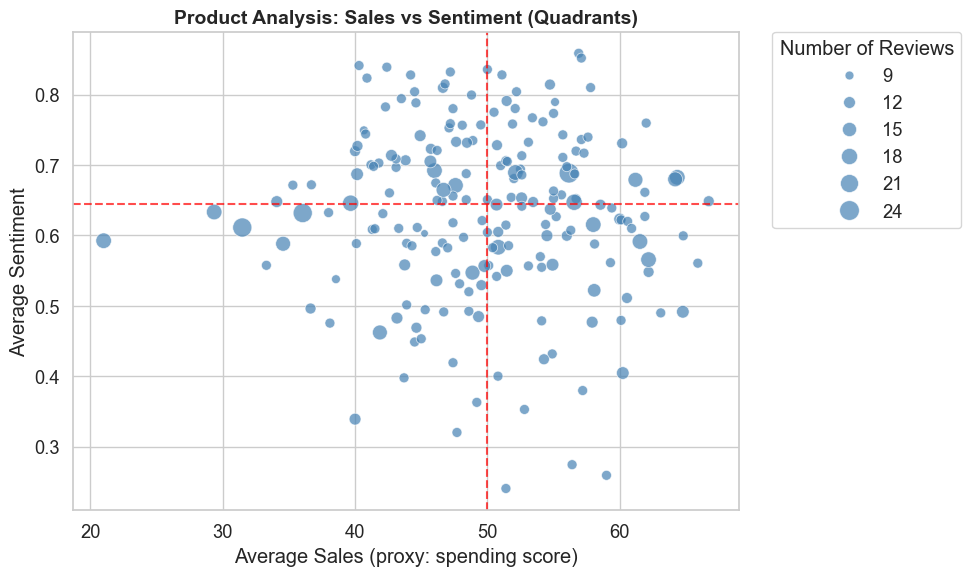

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate sales & sentiment at product level ---
product_stats = (
    df_full.groupby("product")
           .agg(avg_sales=("spending_score", "mean"),
                avg_sentiment=("review_vader_compound", "mean"),
                n_reviews=("review", "count"))
           .reset_index()
)

# Calculate midpoints for quadrant split ---
sales_median = product_stats["avg_sales"].median()
sentiment_median = product_stats["avg_sentiment"].median()

# Step 3: Scatterplot ---
plt.figure(figsize=(10,6))
scatter = sns.scatterplot(
    data=product_stats,
    x="avg_sales", 
    y="avg_sentiment", 
    size="n_reviews", 
    sizes=(30, 200),
    alpha=0.7,
    color="steelblue",
    edgecolor="white",
    legend="brief"
)

# Add quadrant lines
plt.axvline(sales_median, color="red", linestyle="--", alpha=0.7)
plt.axhline(sentiment_median, color="red", linestyle="--", alpha=0.7)

# Labels and title
plt.title("Product Analysis: Sales vs Sentiment (Quadrants)", fontsize=14, weight="bold")
plt.xlabel("Average Sales (proxy: spending score)")
plt.ylabel("Average Sentiment")

# Improve legend 
handles, labels = scatter.get_legend_handles_labels()
plt.legend(
    handles, labels,
    title="Number of Reviews",   # clearer title
    bbox_to_anchor=(1.05, 1),    # move legend outside plot
    loc="upper left",
    borderaxespad=0
)

plt.tight_layout()
plt.show()

#### Find a sample of product codes for each quadrant

In [113]:
# Group by product to get sales proxy and sentiment averages
product_summary = df_full.groupby("product").agg({
    "spending_score": "mean",           # proxy for sales
    "review_vader_compound": "mean",    # average sentiment
    "review": "count"                   # number of reviews (size for bubbles)
}).reset_index()

# Rename columns for clarity
product_summary.rename(columns={
    "spending_score": "sales_proxy",
    "review_vader_compound": "avg_sentiment",
    "review": "n_reviews"
}, inplace=True)

print(product_summary.head())
print("Unique products:", product_summary['product'].nunique())

   product  sales_proxy  avg_sentiment  n_reviews
0      107         50.0        0.65081         10
1      123         55.7        0.74289         10
2      195         50.5        0.77503         10
3      231         50.7        0.54182         10
4      249         52.5        0.69419         10
Unique products: 200


In [114]:
# Median splits
x_med = product_summary['sales_proxy'].median()
y_med = product_summary['avg_sentiment'].median()

# Define quadrants
cash_cows = product_summary[(product_summary['sales_proxy'] >= x_med) & (product_summary['avg_sentiment'] >= y_med)]
hidden_gems = product_summary[(product_summary['sales_proxy'] < x_med) & (product_summary['avg_sentiment'] >= y_med)]
risks = product_summary[(product_summary['sales_proxy'] >= x_med) & (product_summary['avg_sentiment'] < y_med)]
low_priority = product_summary[(product_summary['sales_proxy'] < x_med) & (product_summary['avg_sentiment'] < y_med)]

# Pick top 3 from each 
top_cash_cows = cash_cows.nlargest(3, 'sales_proxy')[['product','sales_proxy','avg_sentiment']]
top_hidden_gems = hidden_gems.nlargest(3, 'avg_sentiment')[['product','sales_proxy','avg_sentiment']]
top_risks = risks.nlargest(3, 'sales_proxy')[['product','sales_proxy','avg_sentiment']]
top_low_priority = low_priority.nsmallest(3, 'sales_proxy')[['product','sales_proxy','avg_sentiment']]

print("Cash Cows (High Sales, High Sentiment):")
print(top_cash_cows, "\n")

print("Hidden Gems (Low Sales, High Sentiment):")
print(top_hidden_gems, "\n")

print("Risks (High Sales, Low Sentiment):")
print(top_risks, "\n")

print("Low Priority (Low Sales, Low Sentiment):")
print(top_low_priority, "\n")

Cash Cows (High Sales, High Sentiment):
     product  sales_proxy  avg_sentiment
86      3153    66.727273       0.648627
117     4405    64.352941       0.682576
135     5726    64.187500       0.679706 

Hidden Gems (Low Sales, High Sentiment):
     product  sales_proxy  avg_sentiment
132     5493         40.3        0.84135
68      2371         42.4        0.83900
92      3427         47.2        0.83218 

Risks (High Sales, Low Sentiment):
     product  sales_proxy  avg_sentiment
133     5510    65.900000       0.560610
145     6466    64.800000       0.599450
80      2829    64.769231       0.491592 

Low Priority (Low Sales, Low Sentiment):
    product  sales_proxy  avg_sentiment
60     2173    21.000000       0.592494
37     1175    29.352941       0.633288
36     1031    31.478261       0.611270 



## Quadrant Interpretation: Sales vs Sentiment

Using average spending score as a **proxy for sales** and VADER compound as a **proxy for sentiment**, we can categorise products into four strategic quadrants:


###  Cash Cows (High Sales, High Sentiment)  
These are well-performing products with both strong sales and strong customer sentiment. They represent the **core portfolio** and should be protected and leveraged further.  

**Examples:**  
- Product **3153** — sales proxy *66.7*, sentiment *0.65*  
- Product **4405** — sales proxy *64.4*, sentiment *0.68*  
- Product **5726** — sales proxy *64.2*, sentiment *0.68*  

**Action:** Continue investment, loyalty programs, and ensure supply chain consistency.  


### Hidden Gems (Low Sales, High Sentiment)  
Products that customers love but currently don’t sell in high volume. These are **opportunities for growth** through better marketing and visibility.  

**Examples:**  
- Product **5493** — sales proxy *40.3*, sentiment *0.84*  
- Product **2371** — sales proxy *42.4*, sentiment *0.84*  
- Product **3427** — sales proxy *47.2*, sentiment *0.83*  

**Action:** Increase promotion and distribution to scale these successes.  


### Risks (High Sales, Low Sentiment)  
These products sell well but receive **poorer sentiment scores**, representing a **reputation risk** if not addressed.  

**Examples:**  
- Product **5510** — sales proxy *65.9*, sentiment *0.56*  
- Product **6466** — sales proxy *64.8*, sentiment *0.60*  
- Product **2829** — sales proxy *64.8*, sentiment *0.49*  

**Action:** Investigate quality issues, customer complaints, and consider product redesign or messaging updates.  


### Low Priority (Low Sales, Low Sentiment)  
Products that underperform in both sales and sentiment. These are **low-value segments** that may not justify further investment.  

**Examples:**  
- Product **2173** — sales proxy *21.0*, sentiment *0.59*  
- Product **1175** — sales proxy *29.4*, sentiment *0.63*  
- Product **1031** — sales proxy *31.5*, sentiment *0.61*  

**Action:** Consider rationalisation, low-cost nurturing, or discontinuation.  





End of Notebook